In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Walmart DataSet.csv')

In [3]:
data.head(500)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
495,4,13-05-2011,2002362.37,0,70.65,3.872,129.089000,5.946
496,4,20-05-2011,2015563.48,0,70.49,3.881,129.075677,5.946
497,4,27-05-2011,1986597.95,0,73.65,3.771,129.062355,5.946
498,4,03-06-2011,2065377.15,0,78.26,3.683,129.049032,5.946


In [4]:
data.shape

(6435, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [8]:
data['Temperature'].unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

In [9]:
data['Holiday_Flag'].unique()

array([0, 1], dtype=int64)

In [10]:
min_temp = data['Temperature'].min()
max_temp = data['Temperature'].max()

min_temp, max_temp

(-2.06, 100.14)

In [11]:
data['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

### Weekly Sales and Unemployment in the respective areas, where stores are located, have been selected.

In [12]:
df = data[['Store','Weekly_Sales','Unemployment']]
df

,Store,Weekly_Sales,Unemployment
0,1,1643690.90,8.106
1,1,1641957.44,8.106
2,1,1611968.17,8.106
3,1,1409727.59,8.106
4,1,1554806.68,8.106
...,...,...,...
6430,45,713173.95,8.684
6431,45,733455.07,8.667
6432,45,734464.36,8.667
6433,45,718125.53,8.667


In [13]:
WS = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
UR = df.groupby('Store')['Unemployment'].sum().reset_index()

In [14]:
WS = WS.sort_values(by = 'Weekly_Sales',ascending=False)  # WS = Weekly Sales
UR = UR.sort_values(by = 'Unemployment',ascending=False)  # UR = Unemployment     

In [15]:
WS

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [16]:
UR

,Store,Unemployment
27,28,1875.657
37,38,1875.657
11,12,1875.657
42,43,1420.677
33,34,1420.677
28,29,1402.313
17,18,1263.877
34,35,1256.766
13,14,1236.771
44,45,1236.771


### Plot of Total Weekly Sales and Unemployment vs Store Numbers

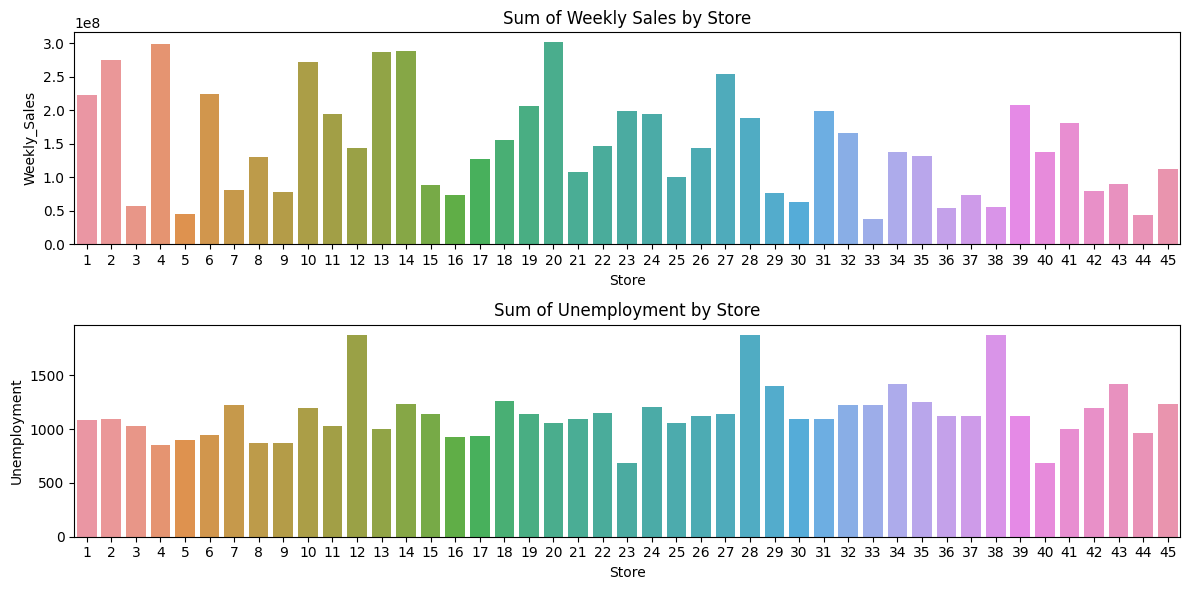

In [17]:
# Plotting using seaborn
plt.figure(figsize=(12, 6))

# Bar plot for Weekly Sales
plt.subplot(2, 1, 1)
sns.barplot(x='Store', y='Weekly_Sales', data=WS)
plt.title('Sum of Weekly Sales by Store')

# Bar plot for Unemployment
plt.subplot(2, 1, 2)
sns.barplot(x='Store', y='Unemployment', data=UR)
plt.title('Sum of Unemployment by Store')

plt.tight_layout()
plt.show()

In [18]:
WSUR = df.groupby('Store')['Weekly_Sales','Unemployment'].sum()
WSUR.sort_values(by = 'Unemployment',ascending=False)


,Weekly_Sales,Unemployment
Store,,
28,1.892637e+08,1875.657
38,5.515963e+07,1875.657
12,1.442872e+08,1875.657
43,9.056544e+07,1420.677
34,1.382498e+08,1420.677
29,7.714155e+07,1402.313
18,1.551147e+08,1263.877
35,1.315207e+08,1256.766
14,2.889999e+08,1236.771


In [19]:
CPI_mean = data.groupby('Store')['CPI'].mean().reset_index()
CPI_mean

,Store,CPI
0,1,215.996892
1,2,215.646311
2,3,219.391531
3,4,128.679669
4,5,216.565581
5,6,217.553197
6,7,193.664243
7,8,219.439026
8,9,219.626689
9,10,128.679669


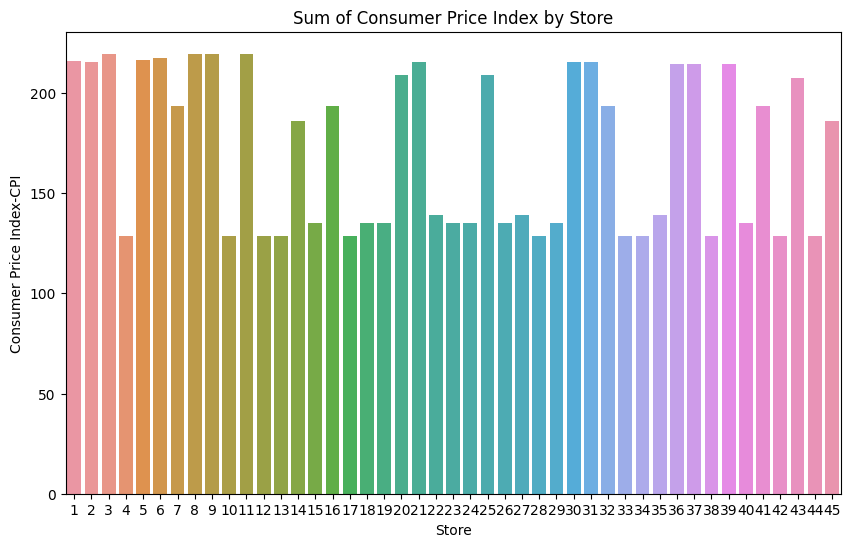

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=CPI_mean['Store'], y=CPI_mean['CPI'])
plt.title('Sum of Consumer Price Index by Store')
plt.xlabel('Store')
plt.ylabel('Consumer Price Index-CPI')
plt.show()

## Ratio of Total weekly Sales vs Unemployment is plotted to select best and worst performing stores

In [21]:
ratio = WS['Weekly_Sales'] / (UR['Unemployment']*100000)

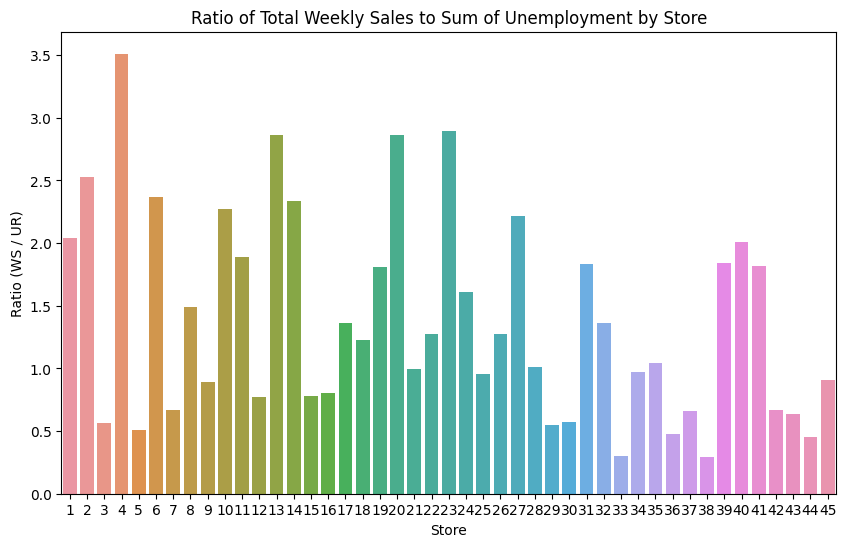

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=WS['Store'], y=ratio)
plt.title('Ratio of Total Weekly Sales to Sum of Unemployment by Store')
plt.xlabel('Store')
plt.ylabel('Ratio (WS / UR)')
plt.show()

### The ratio of weekly sales to unemployment (WS / UR) is calculated with respect to each store. 

### The mean of consumer price index (CPI) is considered w.r.t the each store.

### Store no. 4 is the best performing store with WS / UR ratio as the highest i.e.,3.5.

### Store nos.33 and 38 is the worst performing stores with WS / UR ratio as the lowest i.e., around 0.25.

### It was also noted that there is hardly any difference in the consumer price index for Store nos. 4 and 38. 

### The CPI is almost the same for Store nos.4, 33 and 38.

### It was obserbed that Store nos. 2 and 20 have greater (WS / UR) despite higher CPI value as compared to Store no.4.

### The Walmart data analysis has been further carried out for these selected Store nos. 2,4,33 and 38.  


-----------------------------------------------------------------------------------------------------------------------------

## Analysis for Store No. 4

In [23]:
df4 = data[data['Store'] == 4]
df4.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
429,4,05-02-2010,2135143.87,0,43.76,2.598,126.442065,8.623
430,4,12-02-2010,2188307.39,1,28.84,2.573,126.496258,8.623
431,4,19-02-2010,2049860.26,0,36.45,2.540,126.526286,8.623
432,4,26-02-2010,1925728.84,0,41.36,2.590,126.552286,8.623
433,4,05-03-2010,1971057.44,0,43.49,2.654,126.578286,8.623


In [24]:
min_temp = df4['Temperature'].min()
max_temp = df4['Temperature'].max()

min_temp, max_temp

(28.84, 86.09)

### Checking if the temperature in area of Store no. 4 has any effect on the weekly sales

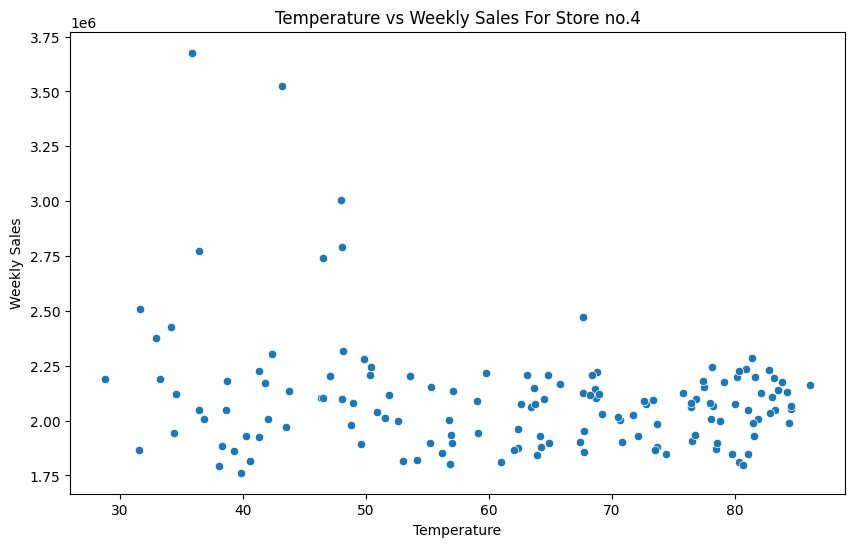

In [25]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df4)
plt.title('Temperature vs Weekly Sales For Store no.4')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


### To get insights of the effect of the temperature, a range of temperature between 28 and 60 have been selected.

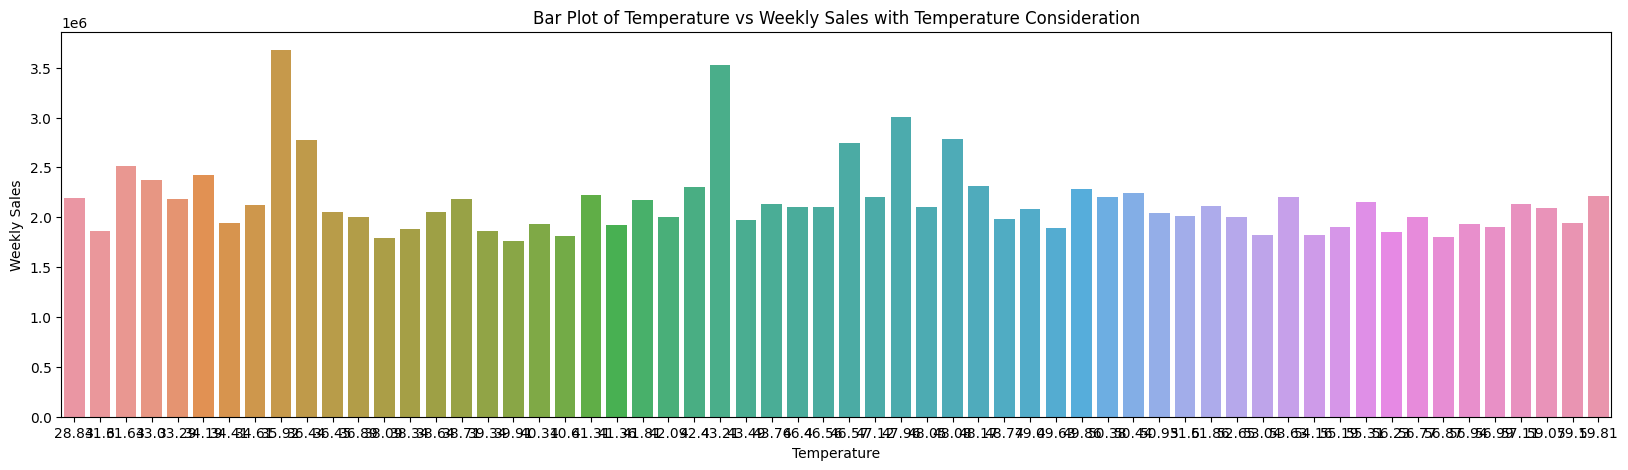

In [26]:
# Assuming you want to create df1 from df based on a temperature range
e = df4[(df4['Temperature'] > 28) & (df4['Temperature'] < 60)]

# Assuming you have a DataFrame named 'df' with columns 'Temperature', 'Weekly_Sales', and 'Holiday_Flag'

# Create a bar plot
plt.figure(figsize=(20, 5))
sns.barplot(x='Temperature', y='Weekly_Sales', data=e)
plt.title('Bar Plot of Temperature vs Weekly Sales with Temperature Consideration')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()



### The temperature has no effect on the weekly sales for Store no.4.

### Checking the trends of weekly sales at the end of each year - 2010, 2011 and 2012

In [27]:
df4['Date'] = pd.to_datetime(df4['Date'],format='%d-%m-%Y')

# Extract day, month, and year into separate columns
df4['day'] = df4['Date'].dt.day
df4['month'] = df4['Date'].dt.month
df4['year'] = df4['Date'].dt.year

df4

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
430,4,2010-02-12,2188307.39,1,28.84,2.573,126.496258,8.623,12,2,2010
431,4,2010-02-19,2049860.26,0,36.45,2.540,126.526286,8.623,19,2,2010
432,4,2010-02-26,1925728.84,0,41.36,2.590,126.552286,8.623,26,2,2010
433,4,2010-03-05,1971057.44,0,43.49,2.654,126.578286,8.623,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
567,4,2012-09-28,2027620.23,0,71.74,3.666,131.043000,4.077,28,9,2012
568,4,2012-10-05,2209835.43,0,63.07,3.620,131.075667,3.879,5,10,2012
569,4,2012-10-12,2133026.07,0,57.11,3.603,131.108333,3.879,12,10,2012
570,4,2012-10-19,2097266.85,0,64.46,3.610,131.149968,3.879,19,10,2012


In [28]:
df4['year'].unique()

array([2010, 2011, 2012], dtype=int64)

In [29]:
year_2010 = df4[df4['year'] == 2010]
year_2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
430,4,2010-02-12,2188307.39,1,28.84,2.573,126.496258,8.623,12,2,2010
431,4,2010-02-19,2049860.26,0,36.45,2.540,126.526286,8.623,19,2,2010
432,4,2010-02-26,1925728.84,0,41.36,2.590,126.552286,8.623,26,2,2010
433,4,2010-03-05,1971057.44,0,43.49,2.654,126.578286,8.623,5,3,2010
434,4,2010-03-12,1894324.09,0,49.63,2.704,126.604286,8.623,12,3,2010
435,4,2010-03-19,1897429.36,0,55.19,2.743,126.606645,8.623,19,3,2010
436,4,2010-03-26,1762539.30,0,39.91,2.752,126.605064,8.623,26,3,2010
437,4,2010-04-02,1979247.12,0,48.77,2.740,126.603484,7.896,2,4,2010
438,4,2010-04-09,1818452.72,0,54.16,2.773,126.601903,7.896,9,4,2010


In [30]:
year_2010 = year_2010[['Weekly_Sales','month']]
year_2010

,Weekly_Sales,month
429,2135143.87,2
430,2188307.39,2
431,2049860.26,2
432,1925728.84,2
433,1971057.44,3
434,1894324.09,3
435,1897429.36,3
436,1762539.30,3
437,1979247.12,4
438,1818452.72,4


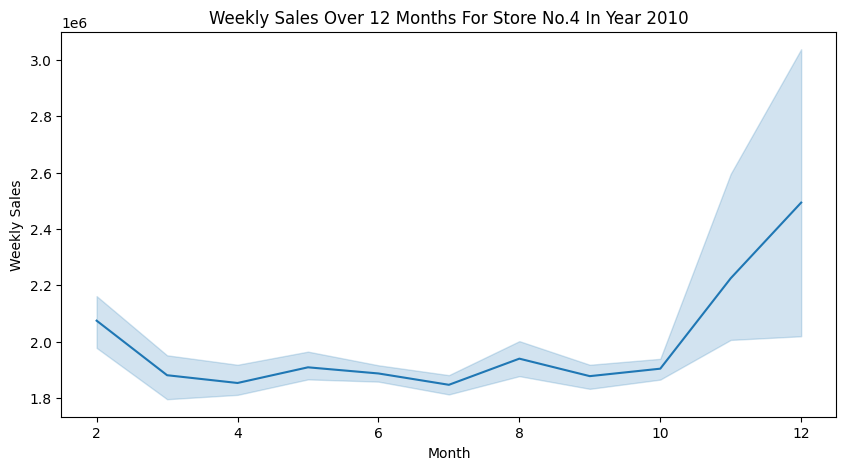

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Weekly_Sales', data=year_2010)
plt.title('Weekly Sales Over 12 Months For Store No.4 In Year 2010')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [32]:
## Increase in weekly sales at the end of 10th month i.e., October

In [33]:
year_2011 = df4[df4['year'] == 2011]
year_2011.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
477,4,2011-01-07,1862476.27,0,39.34,2.980,127.191774,6.51,7,1,2011
478,4,2011-01-14,1865502.46,0,31.60,2.992,127.300935,6.51,14,1,2011
479,4,2011-01-21,1886393.94,0,38.34,3.017,127.440484,6.51,21,1,2011
480,4,2011-01-28,1814240.85,0,40.60,3.022,127.580032,6.51,28,1,2011
481,4,2011-02-04,2119086.04,0,34.61,2.996,127.719581,6.51,4,2,2011


In [34]:
year_2011 = year_2011[['Weekly_Sales','month']]
year_2011

,Weekly_Sales,month
477,1862476.27,1
478,1865502.46,1
479,1886393.94,1
480,1814240.85,1
481,2119086.04,2
482,2187847.29,2
483,2316495.56,2
484,2078094.69,2
485,2103455.75,3
486,2039818.41,3


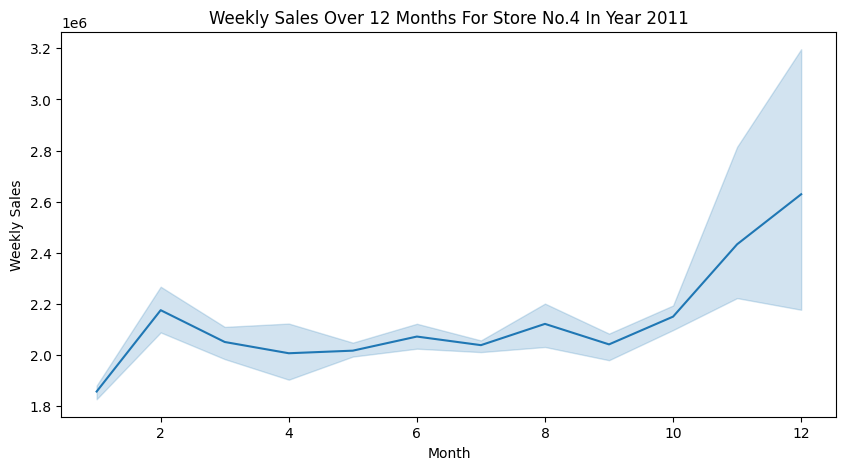

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Weekly_Sales', data=year_2011)
plt.title('Weekly Sales Over 12 Months For Store No.4 In Year 2011')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [36]:
year_2012 = df4[df4['year'] == 2012]
year_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
529,4,2012-01-06,2047766.07,0,38.64,3.158,130.157516,4.607,6,1,2012
530,4,2012-01-13,1941676.61,0,34.41,3.263,130.244000,4.607,13,1,2012
531,4,2012-01-20,2005097.76,0,42.09,3.273,130.279226,4.607,20,1,2012
532,4,2012-01-27,1928720.51,0,40.31,3.290,130.314452,4.607,27,1,2012
533,4,2012-02-03,2173373.91,0,41.81,3.354,130.349677,4.607,3,2,2012


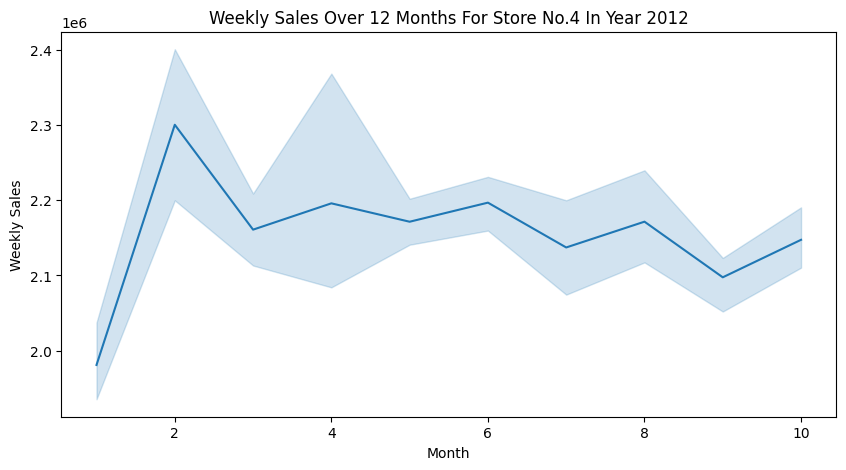

In [37]:
year_2012 = year_2012[['Weekly_Sales','month']]
year_2012

plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Weekly_Sales', data=year_2012)
plt.title('Weekly Sales Over 12 Months For Store No.4 In Year 2012')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

### For Store no.4, there was clearly increase in the weekly sales in 2010 and 2011 after October till the end of December.

### Analyzing trend weekly sales trend by ARIMA and SARIMA

### Checking Stationarity of weekly sales data w.r.t month for Store No.4

In [38]:
data_new = year_2012['Weekly_Sales']

In [39]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(data_new)
print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-4.71900611017377
p-value=7.750007943202877e-05
n_lags,0
series is stationary


In [40]:
from statsmodels.tsa.stattools import kpss

result = kpss(data_new)
print(f'kpss Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is stationary")
else:
    print("series is not stationary")

kpss Statistic,0.10112262756982221
p-value=0.1
n_lags,2
The series is stationary


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13180\1843265022.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data_new)


### After 10th month, the trend for 2012 is unknown.  

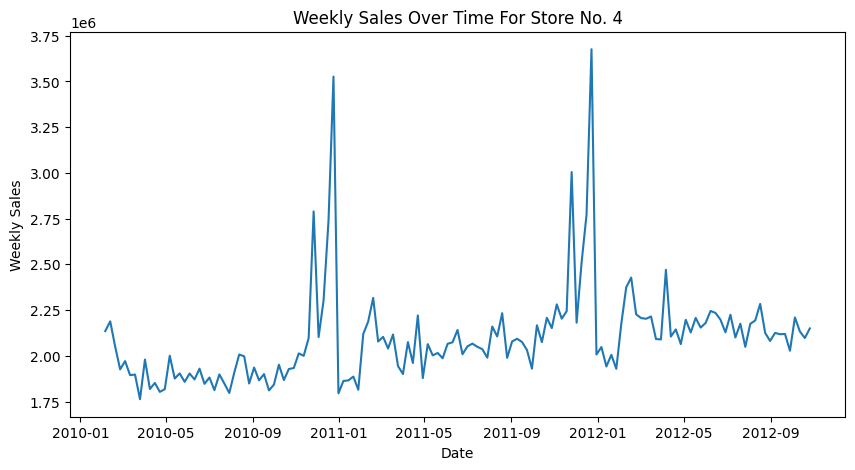

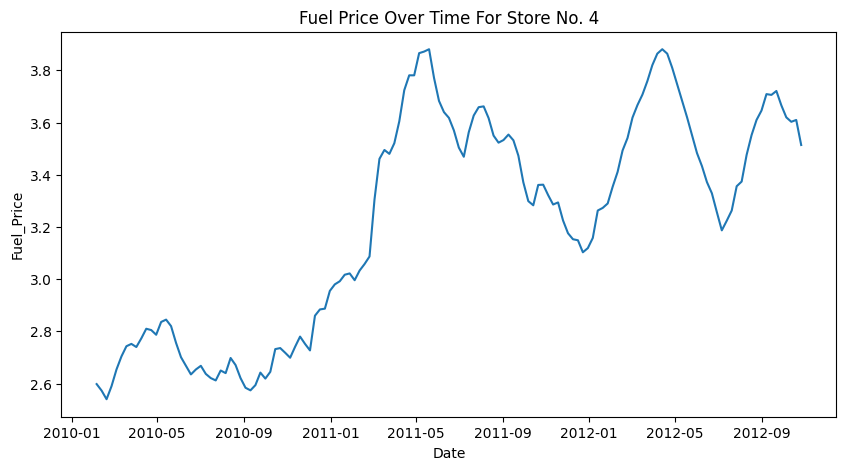

In [206]:
df4_new = df4[['Weekly_Sales','Date']]
df4_new

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Weekly_Sales', data=df4)
plt.title('Weekly Sales Over Time For Store No. 4')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Fuel_Price', data=df4)
plt.title('Fuel Price Over Time For Store No. 4')
plt.xlabel('Date')
plt.ylabel('Fuel_Price')
plt.show()

### For Store No. 4, there is a seasonality as there is a spike in weekly sales after october consecutively in year 2010 and 2011.


In [42]:
df4

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
430,4,2010-02-12,2188307.39,1,28.84,2.573,126.496258,8.623,12,2,2010
431,4,2010-02-19,2049860.26,0,36.45,2.540,126.526286,8.623,19,2,2010
432,4,2010-02-26,1925728.84,0,41.36,2.590,126.552286,8.623,26,2,2010
433,4,2010-03-05,1971057.44,0,43.49,2.654,126.578286,8.623,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
567,4,2012-09-28,2027620.23,0,71.74,3.666,131.043000,4.077,28,9,2012
568,4,2012-10-05,2209835.43,0,63.07,3.620,131.075667,3.879,5,10,2012
569,4,2012-10-12,2133026.07,0,57.11,3.603,131.108333,3.879,12,10,2012
570,4,2012-10-19,2097266.85,0,64.46,3.610,131.149968,3.879,19,10,2012


In [43]:
df4_new = pd.DataFrame(df4[['Weekly_Sales','Date']])
df4_new = df4_new.set_index(['Date'])
df4_new

,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
...,...
2012-09-28,2027620.23
2012-10-05,2209835.43
2012-10-12,2133026.07


In [44]:
mean_log=df4_new.rolling(window=12).mean()
std_log=df4_new.rolling(window=12).std()

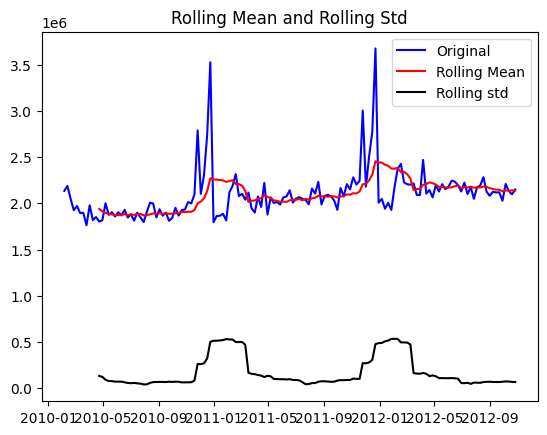

In [45]:
plt.plot(df4_new,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [46]:
## Log transformation of the df1_new

In [47]:
first_log = np.log(df4_new)

In [48]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

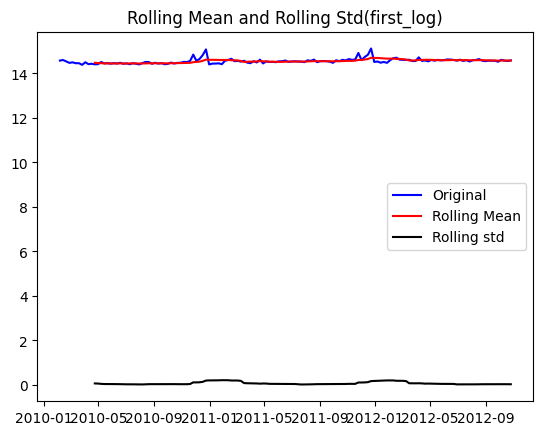

In [49]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std(first_log)')
plt.show()

In [50]:
new_df4=first_log-mean_log

new_df4=new_df4.dropna()

new_df4.head()

,Weekly_Sales
Date,
2010-04-23,-0.071177
2010-04-30,-0.049680
2010-05-07,0.053915
2010-05-14,-0.003214
2010-05-21,0.012642


## Seasonal Decomposition

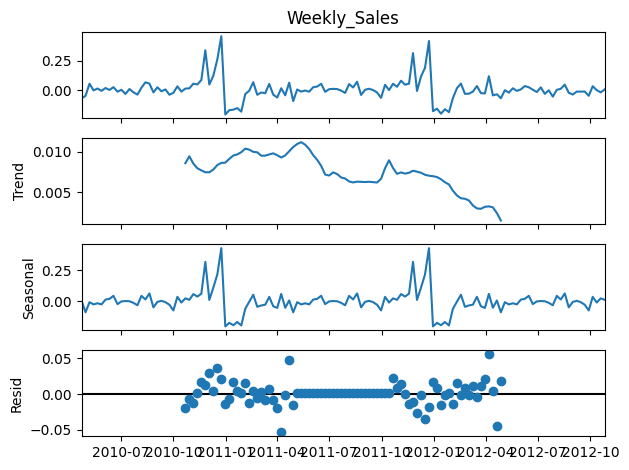

In [51]:
#sesonal decompose: It plots the components of the time series data separately.

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(new_df4['Weekly_Sales'])
decomposition.plot();

In [52]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_df4)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-5.80027013356946
p-value=4.64856802366326e-07
n_lags,4
series is stationary


In [53]:
from statsmodels.tsa.stattools import kpss

result = kpss(new_df4)
print(f'kpss Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is stationary")
else:
    print("series is not stationary")

kpss Statistic,0.05887496315534593
p-value=0.1
n_lags,4
The series is stationary


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13180\1705213483.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(new_df4)


In [54]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

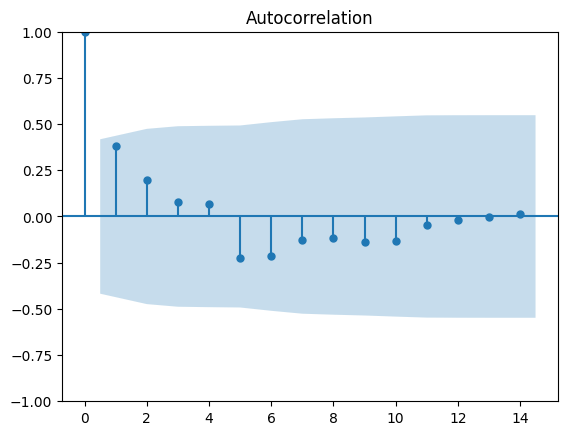

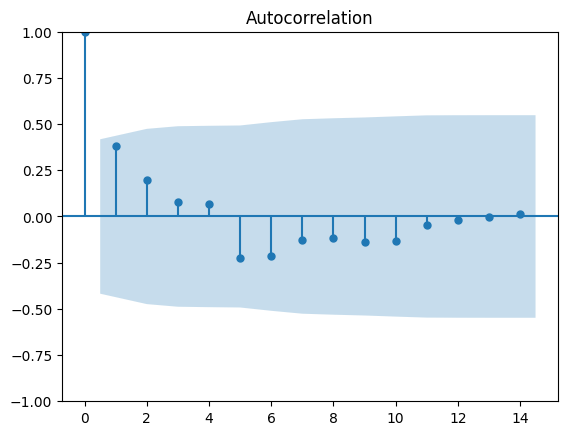

In [55]:
acf_plot=acf(new_df4.dropna())
plot_acf(acf_plot)

In [56]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

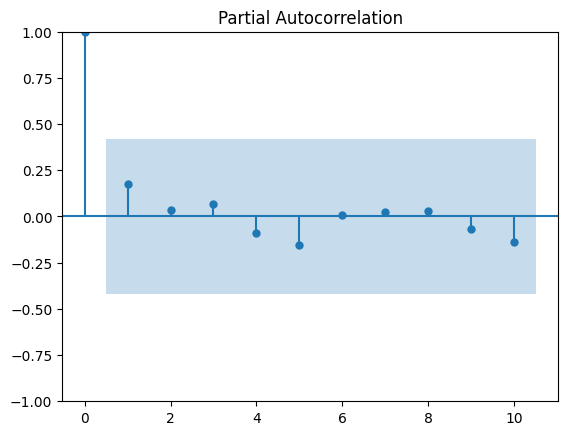

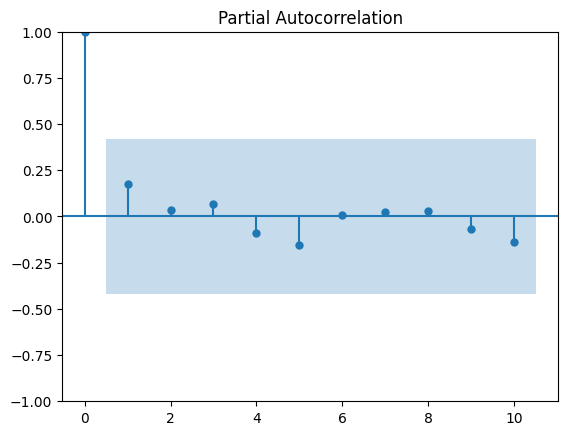

In [57]:
pacf_plot=pacf(new_df4.dropna())
plot_pacf(pacf_plot,lags=10)

In [58]:
new_df4.shape

(132, 1)

In [59]:
train=new_df4.iloc[:110]['Weekly_Sales']
test=new_df4.iloc[110:]['Weekly_Sales']

In [60]:
from statsmodels.tsa.arima.model import ARIMA

In [61]:
model = ARIMA(train,order=(4,1,2)) # p, d, q from above graph
model_fit=model.fit()

C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='Date'>

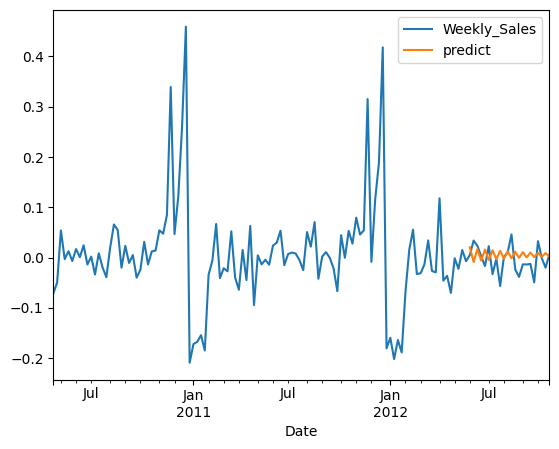

In [62]:
new_df4['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_df4[['Weekly_Sales','predict']].plot()

## USING SARIMA TO PREDICT TREND

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(4,1,2),seasonal_order=(4,1,2,90))  # 12 for year - 12 months
model=model.fit()

C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<AxesSubplot: xlabel='Date'>

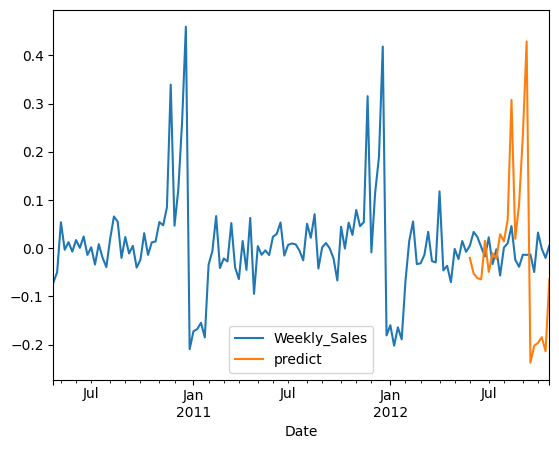

In [64]:
new_df4['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_df4[['Weekly_Sales','predict']].plot()

<AxesSubplot: xlabel='Date'>

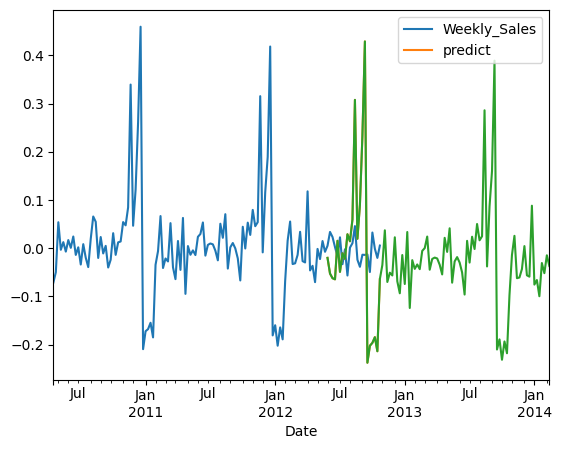

In [65]:
forecast = model.forecast(steps=90)
new_df4.plot()
forecast.plot()

### In contrast to the previous weekly sales trends in year 2011 and 2012, there could be an increase in the weekly sales from August to September in 2012. This trend is compatible with the decrease in the fuel price as plotted during the same period.  

### Applying FB Prophet Model to check the trends of weekly sales and fuel price w.r.t date for Store No.4 

In [66]:
!pip install prophet

In [67]:
from prophet import Prophet

### Trend and Prediction of Weekly Sales w.r.t Date in the area of Store no. 4

In [68]:
store_4_WS = df4[['Date', 'Weekly_Sales']].reset_index(drop=True)
store_4_WS

,Date,Weekly_Sales
0,2010-02-05,2135143.87
1,2010-02-12,2188307.39
2,2010-02-19,2049860.26
3,2010-02-26,1925728.84
4,2010-03-05,1971057.44
...,...,...
138,2012-09-28,2027620.23
139,2012-10-05,2209835.43
140,2012-10-12,2133026.07
141,2012-10-19,2097266.85


In [69]:
store_4_WS.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
store_4_WS

,ds,y
0,2010-02-05,2135143.87
1,2010-02-12,2188307.39
2,2010-02-19,2049860.26
3,2010-02-26,1925728.84
4,2010-03-05,1971057.44
...,...,...
138,2012-09-28,2027620.23
139,2012-10-05,2209835.43
140,2012-10-12,2133026.07
141,2012-10-19,2097266.85


In [70]:
con_model=Prophet(interval_width=0.95)

In [71]:
con_model.fit(store_4_WS)

13:21:49 - cmdstanpy - INFO - Chain [1] start processing
13:21:49 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future=con_model.make_future_dataframe(periods=60)

In [73]:
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
198,2012-12-21
199,2012-12-22
200,2012-12-23
201,2012-12-24


In [74]:
future.tail(10)

,ds
193,2012-12-16
194,2012-12-17
195,2012-12-18
196,2012-12-19
197,2012-12-20
198,2012-12-21
199,2012-12-22
200,2012-12-23
201,2012-12-24
202,2012-12-25


In [75]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
193,2012-12-16,3.049040e+06,2.717996e+06,3.379638e+06
194,2012-12-17,3.062182e+06,2.732366e+06,3.383881e+06
195,2012-12-18,3.069909e+06,2.761228e+06,3.368658e+06
196,2012-12-19,3.071791e+06,2.766108e+06,3.403073e+06
197,2012-12-20,3.067492e+06,2.732582e+06,3.376245e+06
198,2012-12-21,3.056775e+06,2.742202e+06,3.383906e+06
199,2012-12-22,3.039515e+06,2.697208e+06,3.353282e+06
200,2012-12-23,3.015699e+06,2.698795e+06,3.328671e+06
201,2012-12-24,2.985434e+06,2.647509e+06,3.278639e+06
202,2012-12-25,2.948946e+06,2.640418e+06,3.274747e+06


### Weekly Sales Trend For Store no.4

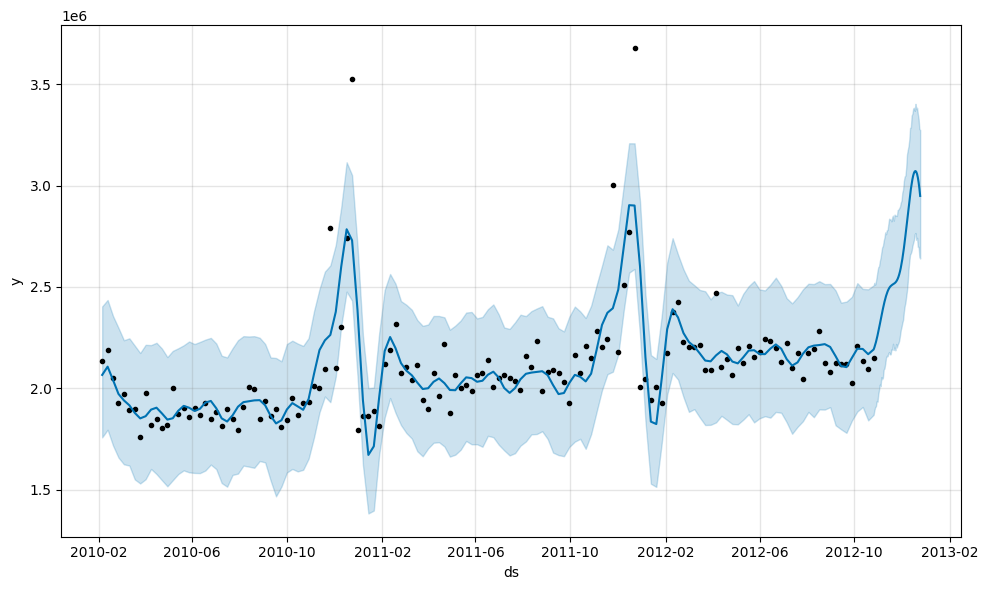

In [76]:
Store_4_WS_plot=con_model.plot(forecast)

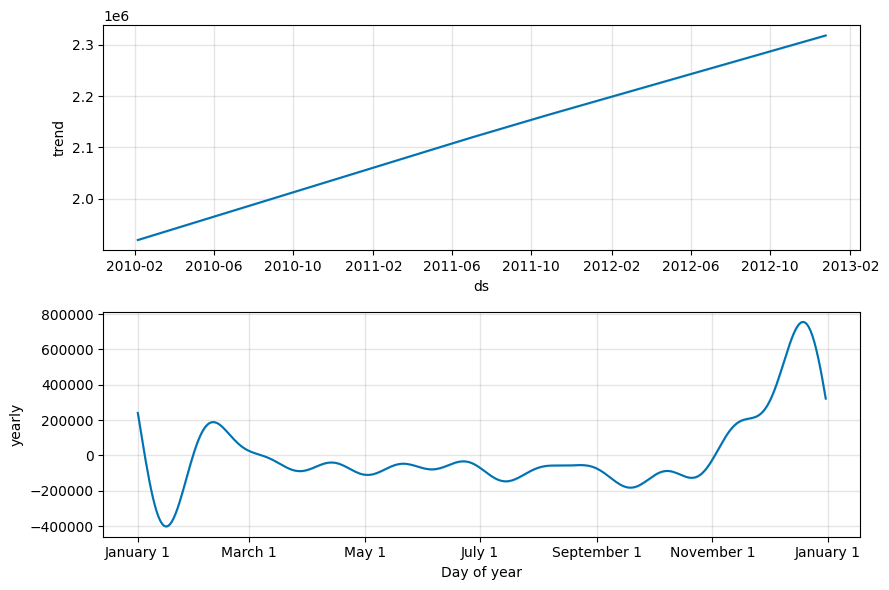

In [77]:
Store_4_WS_forecast_plot1 = con_model.plot_components(forecast)

### According to Prophet model, the weekly sales of Store no. 4 in 2013 follows the trends as in 2011 and 2012. 

### Trend and Prediction of Fuel Price w.r.t Date in the area of Store no. 4

In [78]:
store_4_WS_FP = df4[['Date', 'Fuel_Price']].reset_index(drop=True)
store_4_WS_FP

,Date,Fuel_Price
0,2010-02-05,2.598
1,2010-02-12,2.573
2,2010-02-19,2.540
3,2010-02-26,2.590
4,2010-03-05,2.654
...,...,...
138,2012-09-28,3.666
139,2012-10-05,3.620
140,2012-10-12,3.603
141,2012-10-19,3.610


In [79]:
store_4_WS_FP.rename(columns={"Date":"ds","Fuel_Price":"y"},inplace=True)
store_4_WS_FP

,ds,y
0,2010-02-05,2.598
1,2010-02-12,2.573
2,2010-02-19,2.540
3,2010-02-26,2.590
4,2010-03-05,2.654
...,...,...
138,2012-09-28,3.666
139,2012-10-05,3.620
140,2012-10-12,3.603
141,2012-10-19,3.610


In [80]:
con_model=Prophet(interval_width=0.95)

In [81]:
con_model.fit(store_4_WS_FP)

13:21:51 - cmdstanpy - INFO - Chain [1] start processing
13:21:51 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
future=con_model.make_future_dataframe(periods=60)

In [83]:
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
198,2012-12-21
199,2012-12-22
200,2012-12-23
201,2012-12-24


In [84]:
future.tail(15)

,ds
188,2012-12-11
189,2012-12-12
190,2012-12-13
191,2012-12-14
192,2012-12-15
193,2012-12-16
194,2012-12-17
195,2012-12-18
196,2012-12-19
197,2012-12-20


In [85]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
188,2012-12-11,3.409066,3.217623,3.581969
189,2012-12-12,3.410514,3.238832,3.589371
190,2012-12-13,3.412301,3.240994,3.584741
191,2012-12-14,3.414412,3.229218,3.597241
192,2012-12-15,3.416827,3.238424,3.592229
193,2012-12-16,3.419520,3.231705,3.591022
194,2012-12-17,3.422461,3.237387,3.594831
195,2012-12-18,3.425618,3.250500,3.600979
196,2012-12-19,3.428955,3.269281,3.612214
197,2012-12-20,3.432436,3.254990,3.609148


### Fuel Price Trend In Area of Store no.4

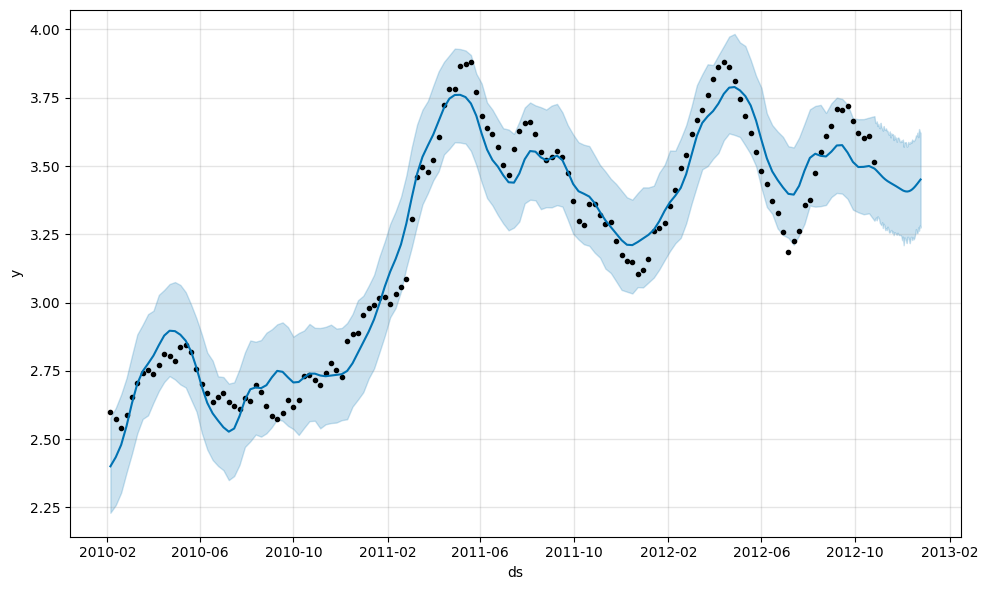

In [86]:
Store_4_WS_FP_plot=con_model.plot(forecast)

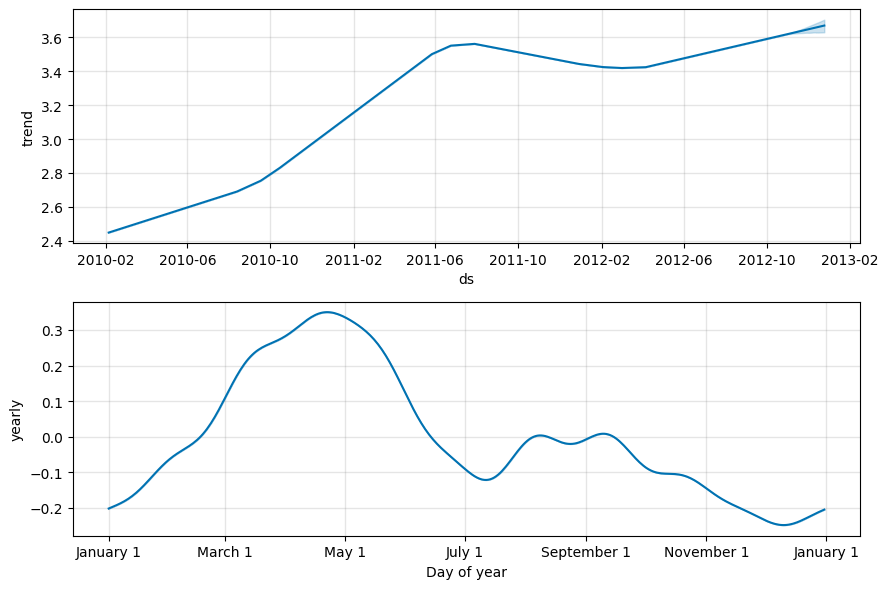

In [87]:
Store_4_WS_FP_forecast_plot1 = con_model.plot_components(forecast)

### By comparing results of ARIMA and PROPHET model, it can be inferred that the possible rise in the weekly sales is because of declining fuel prices in the area where Store no. 4 is located.

--------------------------------------------------------------------------------------------------------------------------------

## Analysis for Store No.38

In [88]:
df38 = data[data['Store'] == 38]
df38

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5291,38,05-02-2010,358496.14,0,49.47,2.962,126.442065,13.975
5292,38,12-02-2010,342214.90,1,47.87,2.946,126.496258,13.975
5293,38,19-02-2010,327237.92,0,54.83,2.915,126.526286,13.975
5294,38,26-02-2010,334222.73,0,50.23,2.825,126.552286,13.975
5295,38,05-03-2010,372239.89,0,53.77,2.987,126.578286,13.975
...,...,...,...,...,...,...,...,...
5429,38,28-09-2012,398468.08,0,81.22,3.966,131.043000,10.926
5430,38,05-10-2012,458479.01,0,81.61,3.966,131.075667,10.199
5431,38,12-10-2012,437320.66,0,71.74,4.468,131.108333,10.199
5432,38,19-10-2012,428806.46,0,68.66,4.449,131.149968,10.199


In [89]:
min_temp = df38['Temperature'].min()
max_temp = df38['Temperature'].max()

min_temp, max_temp

(37.64, 99.22)

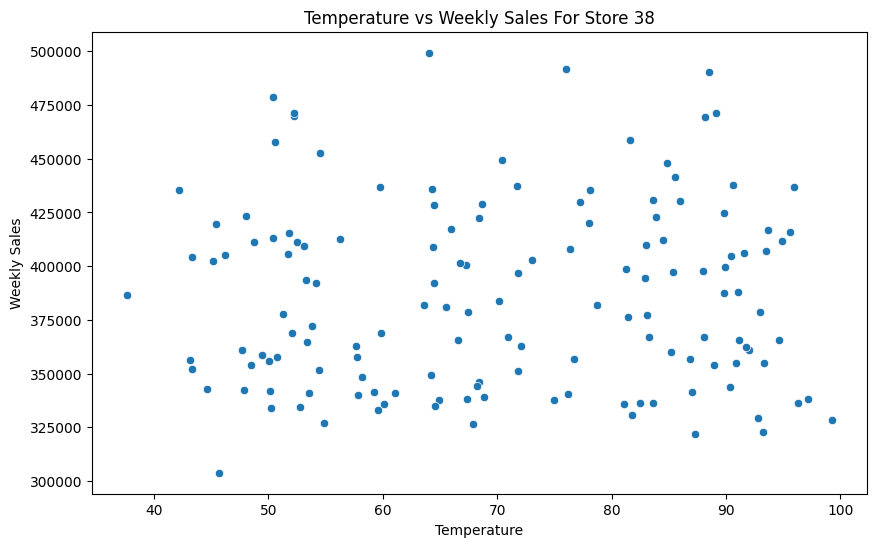

In [90]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df38)
plt.title('Temperature vs Weekly Sales For Store 38')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


In [91]:
df38['Date'] = pd.to_datetime(df38['Date'],format='%d-%m-%Y')

# Extract day, month, and year into separate columns
df38['day'] = df38['Date'].dt.day
df38['month'] = df38['Date'].dt.month
df38['year'] = df38['Date'].dt.year

df38

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
5291,38,2010-02-05,358496.14,0,49.47,2.962,126.442065,13.975,5,2,2010
5292,38,2010-02-12,342214.90,1,47.87,2.946,126.496258,13.975,12,2,2010
5293,38,2010-02-19,327237.92,0,54.83,2.915,126.526286,13.975,19,2,2010
5294,38,2010-02-26,334222.73,0,50.23,2.825,126.552286,13.975,26,2,2010
5295,38,2010-03-05,372239.89,0,53.77,2.987,126.578286,13.975,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
5429,38,2012-09-28,398468.08,0,81.22,3.966,131.043000,10.926,28,9,2012
5430,38,2012-10-05,458479.01,0,81.61,3.966,131.075667,10.199,5,10,2012
5431,38,2012-10-12,437320.66,0,71.74,4.468,131.108333,10.199,12,10,2012
5432,38,2012-10-19,428806.46,0,68.66,4.449,131.149968,10.199,19,10,2012


In [92]:
df38['year'].unique()

array([2010, 2011, 2012], dtype=int64)

In [93]:
year_2010_df38 = df38[df38['year'] == 2010]
year_2010_df38

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
5291,38,2010-02-05,358496.14,0,49.47,2.962,126.442065,13.975,5,2,2010
5292,38,2010-02-12,342214.90,1,47.87,2.946,126.496258,13.975,12,2,2010
5293,38,2010-02-19,327237.92,0,54.83,2.915,126.526286,13.975,19,2,2010
5294,38,2010-02-26,334222.73,0,50.23,2.825,126.552286,13.975,26,2,2010
5295,38,2010-03-05,372239.89,0,53.77,2.987,126.578286,13.975,5,3,2010
5296,38,2010-03-12,342023.92,0,50.11,2.925,126.604286,13.975,12,3,2010
5297,38,2010-03-19,333025.47,0,59.57,3.054,126.606645,13.975,19,3,2010
5298,38,2010-03-26,335858.11,0,60.06,3.083,126.605064,13.975,26,3,2010
5299,38,2010-04-02,368929.55,0,59.84,3.086,126.603484,14.099,2,4,2010
5300,38,2010-04-09,341630.46,0,59.25,3.090,126.601903,14.099,9,4,2010


In [94]:
year_2010_df38 = year_2010_df38[['Weekly_Sales','month']]
year_2010_df38

,Weekly_Sales,month
5291,358496.14,2
5292,342214.90,2
5293,327237.92,2
5294,334222.73,2
5295,372239.89,3
5296,342023.92,3
5297,333025.47,3
5298,335858.11,3
5299,368929.55,4
5300,341630.46,4


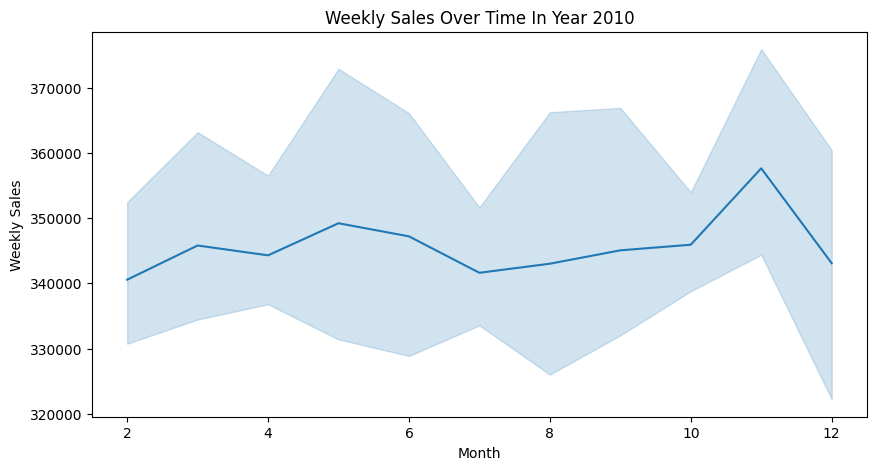

In [95]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Weekly_Sales', data=year_2010_df38)
plt.title('Weekly Sales Over Time In Year 2010')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [96]:
year_2011_df38 = df38[df38['year'] == 2011]
year_2011_df38.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
5339,38,2011-01-07,386344.54,0,37.64,3.287,127.191774,14.021,7,1,2011
5340,38,2011-01-14,356138.79,0,43.15,3.312,127.300935,14.021,14,1,2011
5341,38,2011-01-21,341098.08,0,53.53,3.223,127.440484,14.021,21,1,2011
5342,38,2011-01-28,357557.16,0,50.74,3.342,127.580032,14.021,28,1,2011
5343,38,2011-02-04,402341.76,0,45.14,3.348,127.719581,14.021,4,2,2011
5344,38,2011-02-11,377672.46,1,51.30,3.381,127.859129,14.021,11,2,2011
5345,38,2011-02-18,364606.70,0,53.35,3.430,127.995250,14.021,18,2,2011
5346,38,2011-02-25,354232.34,0,48.45,3.530,128.130000,14.021,25,2,2011
5347,38,2011-03-04,405429.43,0,51.72,3.674,128.264750,14.021,4,3,2011
5348,38,2011-03-11,357897.18,0,57.75,3.818,128.399500,14.021,11,3,2011


In [97]:
year_2011_df38 = year_2011_df38[['Weekly_Sales','month']]
year_2011_df38

,Weekly_Sales,month
5339,386344.54,1
5340,356138.79,1
5341,341098.08,1
5342,357557.16,1
5343,402341.76,2
5344,377672.46,2
5345,364606.70,2
5346,354232.34,2
5347,405429.43,3
5348,357897.18,3


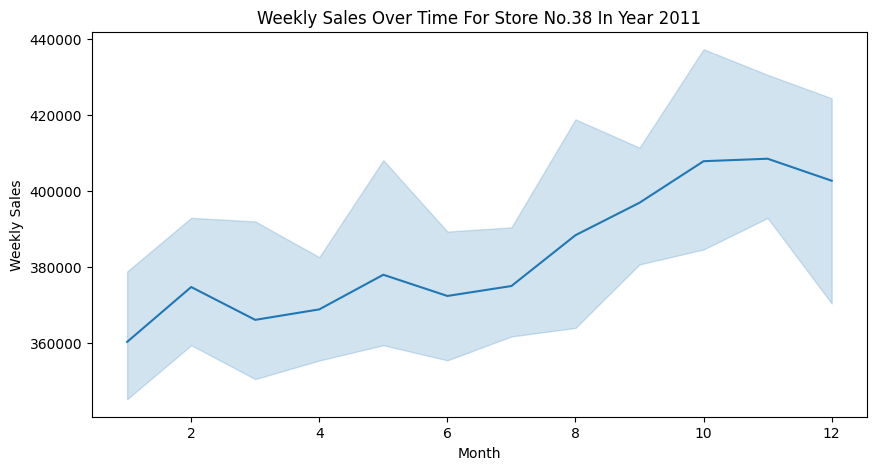

In [98]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Weekly_Sales', data=year_2011_df38)
plt.title('Weekly Sales Over Time For Store No.38 In Year 2011')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

In [99]:
year_2012_df38 = df38[df38['year'] == 2011]
year_2012_df38.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
5339,38,2011-01-07,386344.54,0,37.64,3.287,127.191774,14.021,7,1,2011
5340,38,2011-01-14,356138.79,0,43.15,3.312,127.300935,14.021,14,1,2011
5341,38,2011-01-21,341098.08,0,53.53,3.223,127.440484,14.021,21,1,2011
5342,38,2011-01-28,357557.16,0,50.74,3.342,127.580032,14.021,28,1,2011
5343,38,2011-02-04,402341.76,0,45.14,3.348,127.719581,14.021,4,2,2011
5344,38,2011-02-11,377672.46,1,51.30,3.381,127.859129,14.021,11,2,2011
5345,38,2011-02-18,364606.70,0,53.35,3.430,127.995250,14.021,18,2,2011
5346,38,2011-02-25,354232.34,0,48.45,3.530,128.130000,14.021,25,2,2011
5347,38,2011-03-04,405429.43,0,51.72,3.674,128.264750,14.021,4,3,2011
5348,38,2011-03-11,357897.18,0,57.75,3.818,128.399500,14.021,11,3,2011


In [100]:
year_2012_df38 = year_2011_df38[['Weekly_Sales','month']]
year_2012_df38

,Weekly_Sales,month
5339,386344.54,1
5340,356138.79,1
5341,341098.08,1
5342,357557.16,1
5343,402341.76,2
5344,377672.46,2
5345,364606.70,2
5346,354232.34,2
5347,405429.43,3
5348,357897.18,3


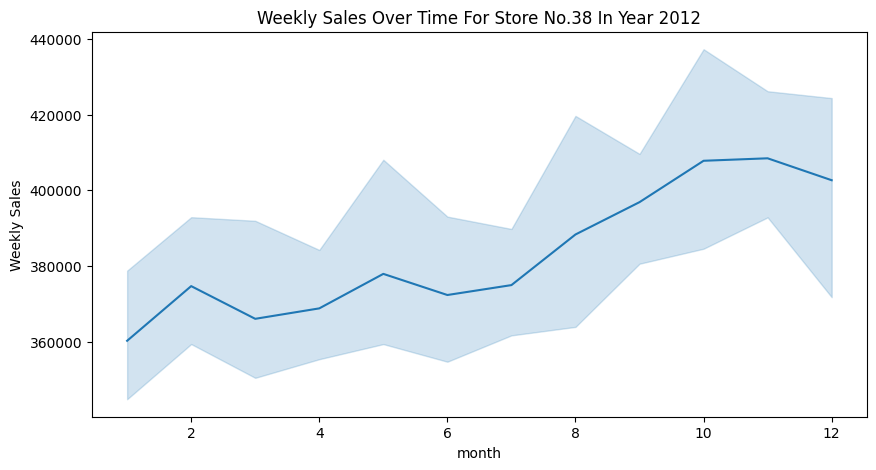

In [207]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='Weekly_Sales', data=year_2012_df38)
plt.title('Weekly Sales Over Time For Store No.38 In Year 2012')
plt.xlabel('month')
plt.ylabel('Weekly Sales')
plt.show()

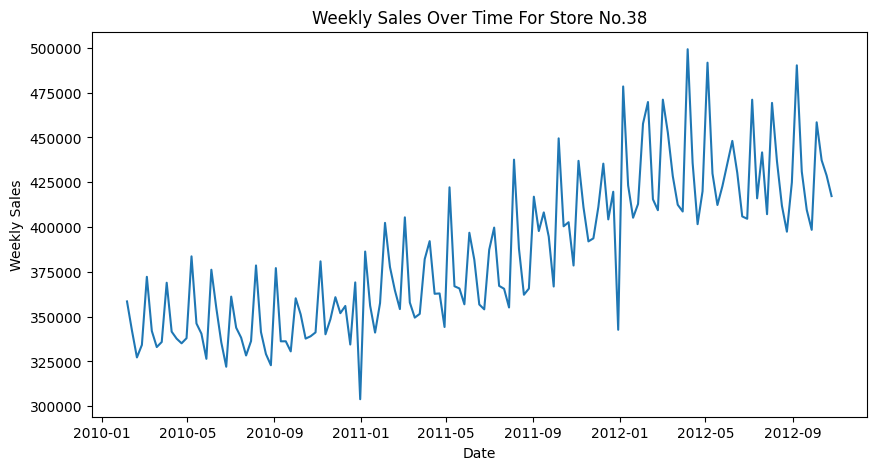

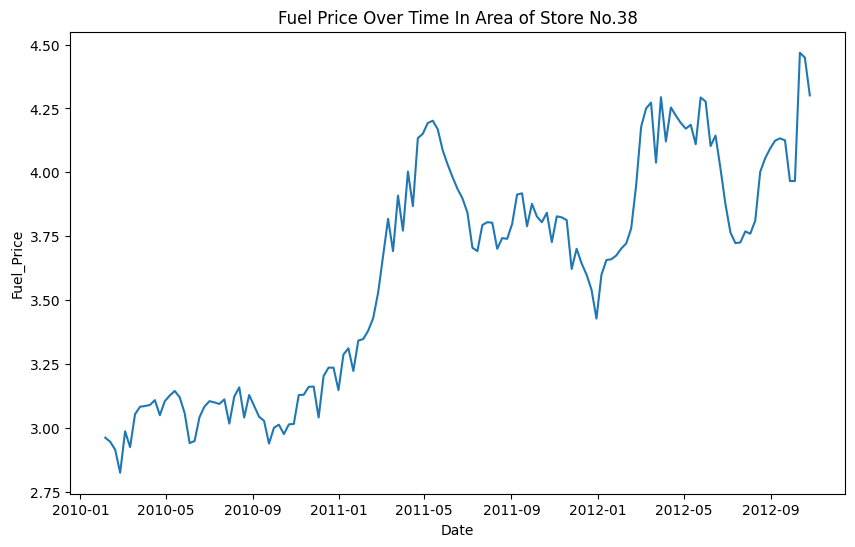

In [102]:
df38_new = df38[['Weekly_Sales','Date']]
df38_new

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Weekly_Sales', data=df38_new)
plt.title('Weekly Sales Over Time For Store No.38')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Fuel_Price', data=df38)
plt.title('Fuel Price Over Time In Area of Store No.38')
plt.xlabel('Date')
plt.ylabel('Fuel_Price')
plt.show()

### Checking stationarity for weekly sales for Store no. 38

In [103]:
df38_new_= df38_new['Weekly_Sales']
df38_new_

5291    358496.14
5292    342214.90
5293    327237.92
5294    334222.73
5295    372239.89
          ...    
5429    398468.08
5430    458479.01
5431    437320.66
5432    428806.46
5433    417290.38
Name: Weekly_Sales, Length: 143, dtype: float64

In [104]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(df38_new_)
print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-0.36001729639642355
p-value=0.9165634765957096
n_lags,12
The series is not stationary


In [105]:
df38

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
5291,38,2010-02-05,358496.14,0,49.47,2.962,126.442065,13.975,5,2,2010
5292,38,2010-02-12,342214.90,1,47.87,2.946,126.496258,13.975,12,2,2010
5293,38,2010-02-19,327237.92,0,54.83,2.915,126.526286,13.975,19,2,2010
5294,38,2010-02-26,334222.73,0,50.23,2.825,126.552286,13.975,26,2,2010
5295,38,2010-03-05,372239.89,0,53.77,2.987,126.578286,13.975,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
5429,38,2012-09-28,398468.08,0,81.22,3.966,131.043000,10.926,28,9,2012
5430,38,2012-10-05,458479.01,0,81.61,3.966,131.075667,10.199,5,10,2012
5431,38,2012-10-12,437320.66,0,71.74,4.468,131.108333,10.199,12,10,2012
5432,38,2012-10-19,428806.46,0,68.66,4.449,131.149968,10.199,19,10,2012


In [106]:
df38_new = pd.DataFrame(df38[['Weekly_Sales','Date']])
df38_new = df38_new.set_index(['Date'])
df38_new

,Weekly_Sales
Date,
2010-02-05,358496.14
2010-02-12,342214.90
2010-02-19,327237.92
2010-02-26,334222.73
2010-03-05,372239.89
...,...
2012-09-28,398468.08
2012-10-05,458479.01
2012-10-12,437320.66


In [107]:
mean_log=df38_new.rolling(window=12).mean()
std_log=df38_new.rolling(window=12).std()

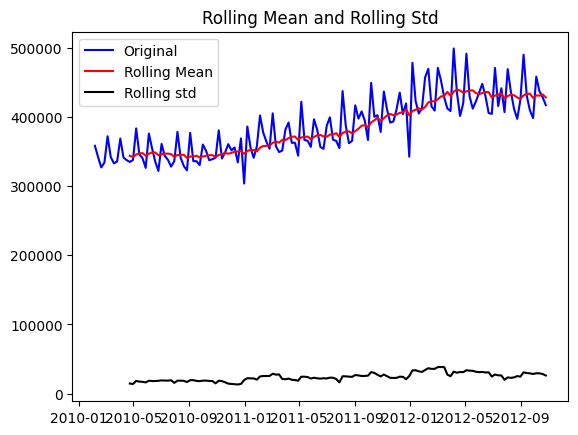

In [108]:
plt.plot(df38_new,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [109]:
## Log transformation of the df1_new

In [110]:
first_log = np.log(df38_new)

In [111]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

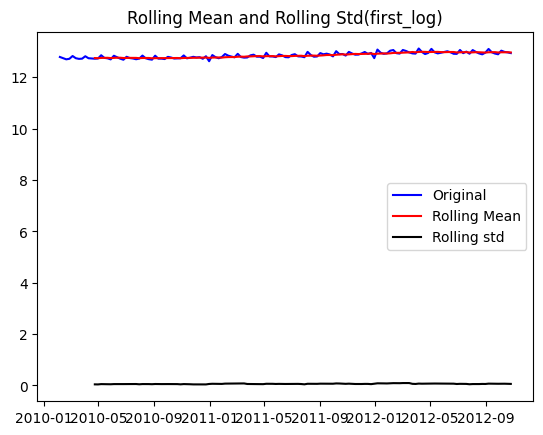

In [112]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std(first_log)')
plt.show()

In [113]:
new_df38=first_log-mean_log
new_df38=new_df38.dropna()
new_df38.head()

,Weekly_Sales
Date,
2010-04-23,-0.025526
2010-04-30,-0.012123
2010-05-07,0.105116
2010-05-14,-0.002380
2010-05-21,-0.020466


## Seasonal Decomposition for Store No.38

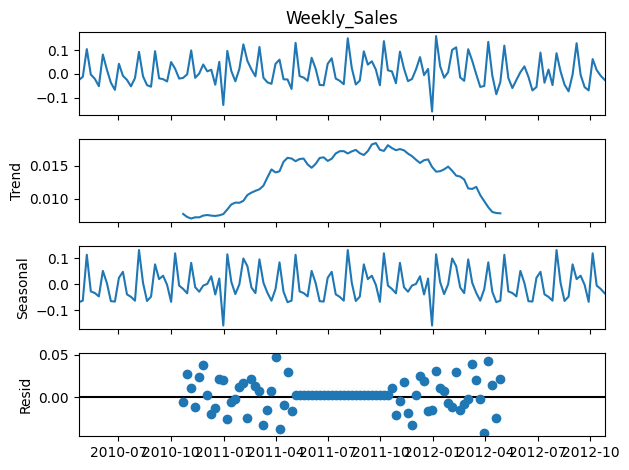

In [114]:
#sesonal decompose: It plots the components of the time series data separately.

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(new_df38['Weekly_Sales'])
decomposition.plot();

In [115]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_df38)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-2.4525680288303553
p-value=0.12744553700538858
n_lags,12
The series is not stationary


In [116]:
from statsmodels.tsa.stattools import kpss

result = kpss(new_df38)
print(f'kpss Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is stationary")
else:
    print("series is not stationary")

kpss Statistic,0.16191431418563193
p-value=0.1
n_lags,51
The series is stationary


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13180\2466867863.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(new_df38)


#### Taking second log again to make the series stationary as there is an ambiguity between results of Adfuller and KPSS tests

In [117]:
second_log = np.log(new_df38)
second_log = second_log.dropna()

In [118]:
mean_log=second_log.rolling(window=12).mean()
std_log=second_log.rolling(window=12).std()

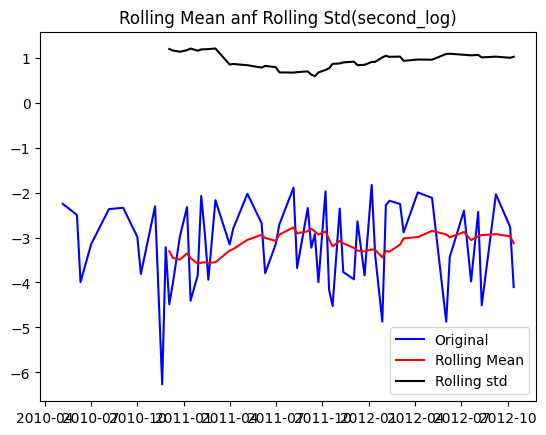

In [119]:
plt.plot(second_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean anf Rolling Std(second_log)')
plt.show()

In [120]:
new_df38_=second_log-mean_log
new_df38_=new_df38.dropna()
new_df38_.head()

,Weekly_Sales
Date,
2010-04-23,-0.025526
2010-04-30,-0.012123
2010-05-07,0.105116
2010-05-14,-0.002380
2010-05-21,-0.020466


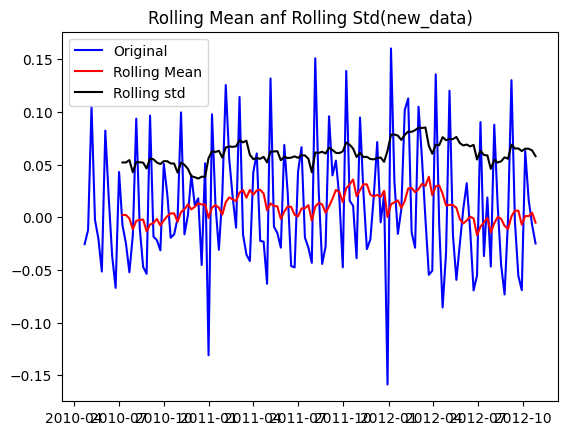

In [122]:
mean_log=new_df38_.rolling(window=12).mean()
std_log=new_df38_.rolling(window=12).std()

plt.plot(new_df38_,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean anf Rolling Std(new_data)')
plt.show()

In [123]:
new_df38_=new_df38_.dropna()

In [124]:
#sesonal decompose: It plots the components of the time series data separately.

#from statsmodels.tsa.seasonal import seasonal_decompose

#decomposition = seasonal_decompose(new_df2_['Weekly_Sales'])
#decomposition.plot();

In [125]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_df38_)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-2.4525680288303553
p-value=0.12744553700538858
n_lags,12
The series is not stationary


In [126]:
from statsmodels.tsa.stattools import kpss

result = kpss(new_df38_)
print(f'kpss Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is stationary")
else:
    print("series is not stationary")

kpss Statistic,0.16191431418563193
p-value=0.1
n_lags,51
The series is stationary


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_13180\2383625249.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(new_df38_)


#### It is observed that ADfuller test gives the same p-value as 0.1274, indicating that there is no stationarity in the series. The results of KPSS test for stationarity have been acknowledged.   

#### Further, it must be noted that the first log and mean results i.e. new_df38, have been taken into account because the first KPSS test showed that the series is stationary. So, the KPSS test is considered as acceptable.  

#### Plotting Autocorrelation Factor

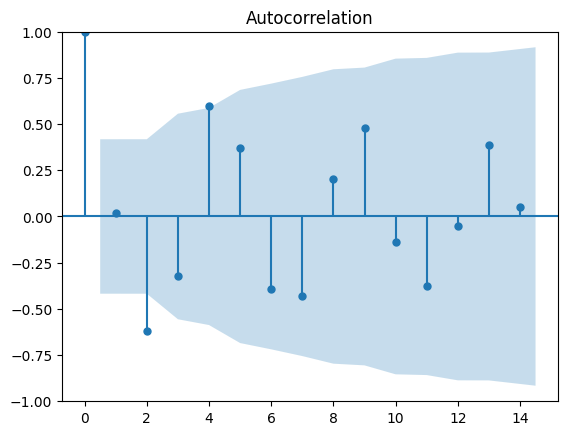

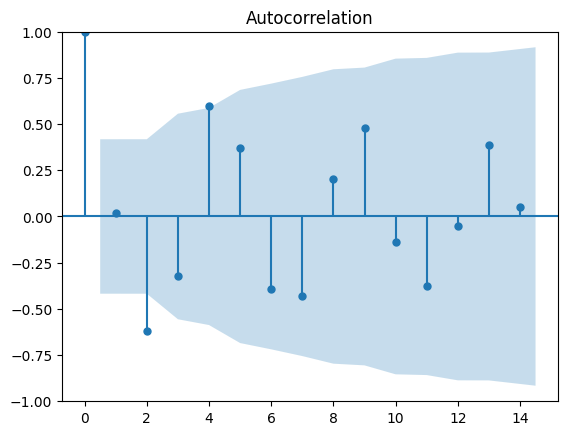

In [127]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_plot=acf(new_df38.dropna())
plot_acf(acf_plot)

#### Plotting Partial Autocorrelation Factor

In [128]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

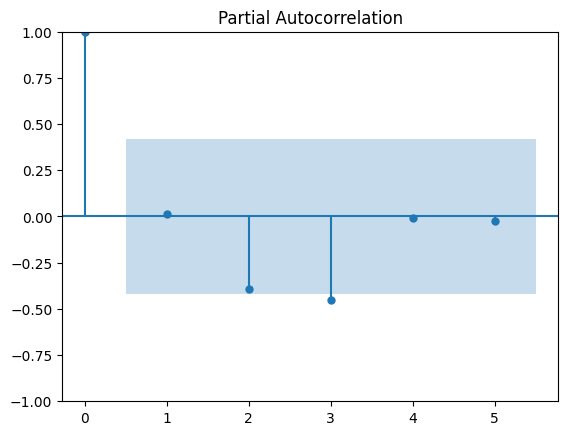

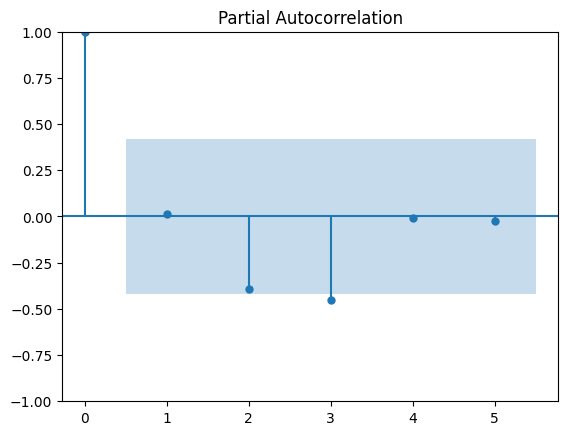

In [129]:
pacf_plot=pacf(new_df38)
plot_pacf(pacf_plot,lags=5)

### Training Model - ARIMA

In [130]:
train=new_df38.iloc[:110]['Weekly_Sales']
test=new_df38.iloc[110:]['Weekly_Sales']

In [131]:
from statsmodels.tsa.arima.model import ARIMA

In [132]:
model = ARIMA(train,order=(1,1,1)) # p, d, q from above graph
model_fit=model.fit()

C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<AxesSubplot: xlabel='Date'>

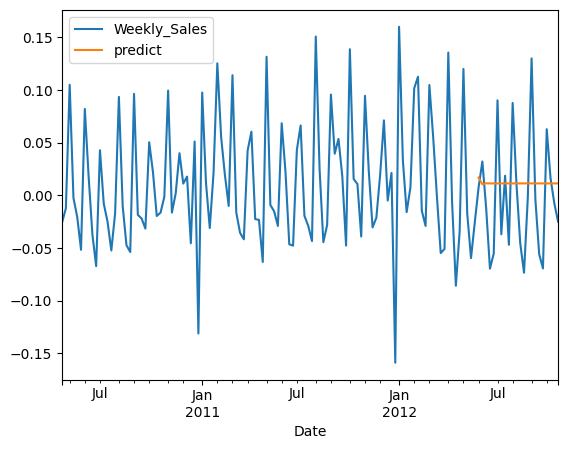

In [133]:
new_df38['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_df38[['Weekly_Sales','predict']].plot()

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,60))  # 12 for year - 12 months
model=model.fit()

C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Shreyas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<AxesSubplot: xlabel='Date'>

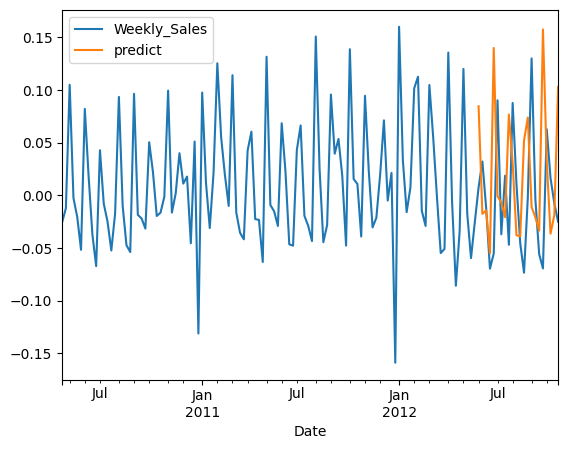

In [135]:
new_df38['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_df38[['Weekly_Sales','predict']].plot()

<AxesSubplot: xlabel='Date'>

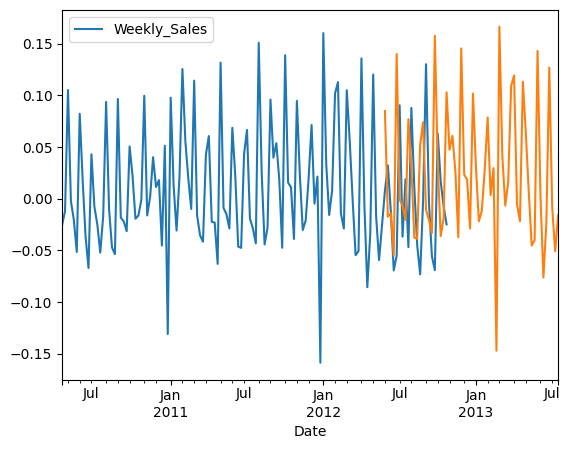

In [136]:
forecast = model.forecast(steps=60)
new_df38_.plot()
forecast.plot()

### For Store no. 38, an uptrend in the weekly sales is observed based on rolling mean figure.

### To get more clarity and verify trends, the trends are analyzed by using Prophet model. 

In [137]:
df38

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
5291,38,2010-02-05,358496.14,0,49.47,2.962,126.442065,13.975,5,2,2010
5292,38,2010-02-12,342214.90,1,47.87,2.946,126.496258,13.975,12,2,2010
5293,38,2010-02-19,327237.92,0,54.83,2.915,126.526286,13.975,19,2,2010
5294,38,2010-02-26,334222.73,0,50.23,2.825,126.552286,13.975,26,2,2010
5295,38,2010-03-05,372239.89,0,53.77,2.987,126.578286,13.975,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
5429,38,2012-09-28,398468.08,0,81.22,3.966,131.043000,10.926,28,9,2012
5430,38,2012-10-05,458479.01,0,81.61,3.966,131.075667,10.199,5,10,2012
5431,38,2012-10-12,437320.66,0,71.74,4.468,131.108333,10.199,12,10,2012
5432,38,2012-10-19,428806.46,0,68.66,4.449,131.149968,10.199,19,10,2012


### Applying FB Prophet Model to check the trends of weekly sales and fuel price w.r.t date for Store No.38

### Trend and Prediction of Weekly Sales w.r.t Date in the area of Store no. 38

In [138]:
from prophet import Prophet

In [139]:
store_38_WS = df38[['Date', 'Weekly_Sales']].reset_index(drop=True)
store_38_WS

,Date,Weekly_Sales
0,2010-02-05,358496.14
1,2010-02-12,342214.90
2,2010-02-19,327237.92
3,2010-02-26,334222.73
4,2010-03-05,372239.89
...,...,...
138,2012-09-28,398468.08
139,2012-10-05,458479.01
140,2012-10-12,437320.66
141,2012-10-19,428806.46


In [140]:
store_38_WS.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
store_38_WS

,ds,y
0,2010-02-05,358496.14
1,2010-02-12,342214.90
2,2010-02-19,327237.92
3,2010-02-26,334222.73
4,2010-03-05,372239.89
...,...,...
138,2012-09-28,398468.08
139,2012-10-05,458479.01
140,2012-10-12,437320.66
141,2012-10-19,428806.46


In [141]:
con_model=Prophet(interval_width=0.95)

In [142]:
# Training of Model (fiting thr data to the model)
con_model.fit(store_38_WS)

13:32:25 - cmdstanpy - INFO - Chain [1] start processing
13:32:25 - cmdstanpy - INFO - Chain [1] done processing


In [143]:
future=con_model.make_future_dataframe(periods=60)

In [144]:
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
198,2012-12-21
199,2012-12-22
200,2012-12-23
201,2012-12-24


In [145]:
future.tail(10)

,ds
193,2012-12-16
194,2012-12-17
195,2012-12-18
196,2012-12-19
197,2012-12-20
198,2012-12-21
199,2012-12-22
200,2012-12-23
201,2012-12-24
202,2012-12-25


In [146]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
188,2012-12-11,452769.466432,408935.665945,497579.151522
189,2012-12-12,452480.840395,404739.911474,501753.138133
190,2012-12-13,452199.208355,403357.320732,500129.387083
191,2012-12-14,451926.049935,404869.988777,498675.636914
192,2012-12-15,451662.720914,407471.484399,497774.062302
193,2012-12-16,451410.554019,402145.632693,498873.272013
194,2012-12-17,451170.960944,406543.966716,495421.880166
195,2012-12-18,450945.530693,406289.974795,499244.425286
196,2012-12-19,450736.119436,404250.656838,498500.811201
197,2012-12-20,450544.927403,404637.631491,499220.863074


### Weekly Sales Trend For Store no. 38

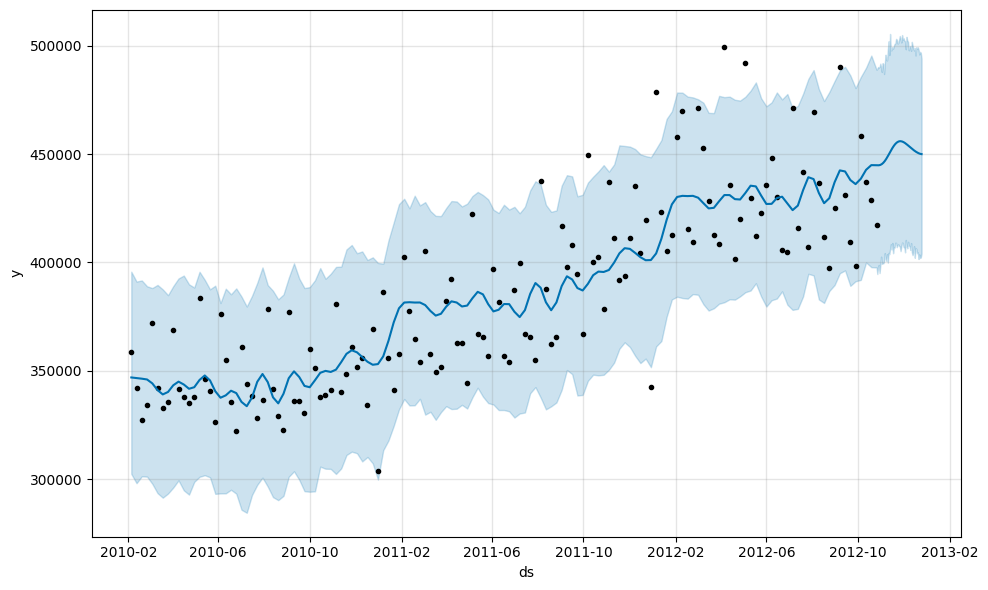

In [147]:
Store_38_WS_plot=con_model.plot(forecast)

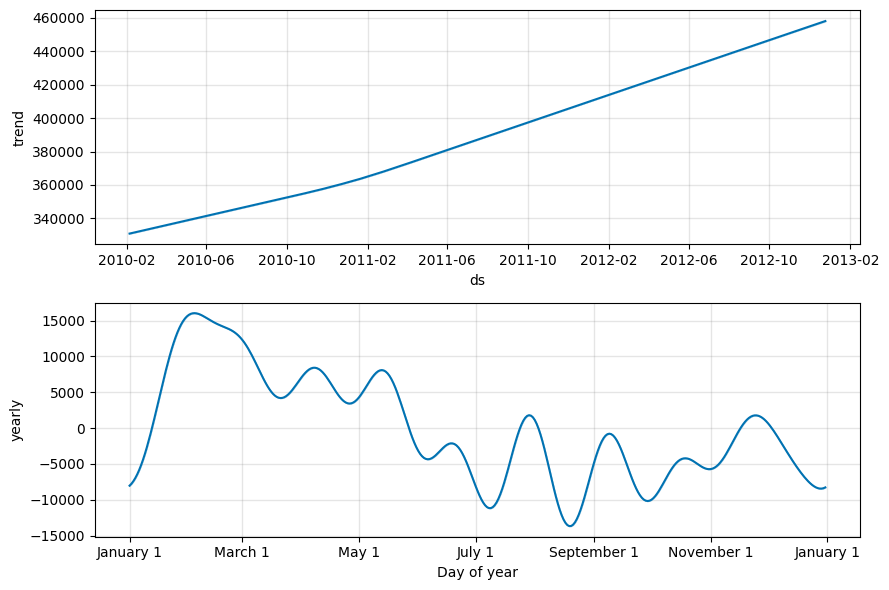

In [148]:
Store_38_WS_forecast_plot1 = con_model.plot_components(forecast)

### An uptrend is observed for the weekly sales of Store no. 38 as shown in the rolling mean figure. There will some increase in the weekly sales in the months November and December of year 2012 as predicted in ARIMA model previously.

### Trend and Prediction of Fuel Price w.r.t Date in the area of Store no.38

In [149]:
store_38_WS_FP = df38[['Date', 'Fuel_Price']].reset_index(drop=True)
store_38_WS_FP

,Date,Fuel_Price
0,2010-02-05,2.962
1,2010-02-12,2.946
2,2010-02-19,2.915
3,2010-02-26,2.825
4,2010-03-05,2.987
...,...,...
138,2012-09-28,3.966
139,2012-10-05,3.966
140,2012-10-12,4.468
141,2012-10-19,4.449


In [150]:
store_38_WS_FP.rename(columns={"Date":"ds","Fuel_Price":"y"},inplace=True)
store_38_WS_FP

,ds,y
0,2010-02-05,2.962
1,2010-02-12,2.946
2,2010-02-19,2.915
3,2010-02-26,2.825
4,2010-03-05,2.987
...,...,...
138,2012-09-28,3.966
139,2012-10-05,3.966
140,2012-10-12,4.468
141,2012-10-19,4.449


In [151]:
con_model=Prophet(interval_width=0.95)

In [152]:
con_model.fit(store_38_WS_FP)

13:32:27 - cmdstanpy - INFO - Chain [1] start processing
13:32:27 - cmdstanpy - INFO - Chain [1] done processing


In [153]:
future=con_model.make_future_dataframe(periods=90)

In [154]:
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
228,2013-01-20
229,2013-01-21
230,2013-01-22
231,2013-01-23


In [155]:
future.tail(10)

,ds
223,2013-01-15
224,2013-01-16
225,2013-01-17
226,2013-01-18
227,2013-01-19
228,2013-01-20
229,2013-01-21
230,2013-01-22
231,2013-01-23
232,2013-01-24


In [156]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
218,2013-01-10,3.962162,3.743451,4.181404
219,2013-01-11,3.966563,3.764050,4.183246
220,2013-01-12,3.971551,3.750590,4.185762
221,2013-01-13,3.977126,3.756188,4.190058
222,2013-01-14,3.983280,3.765714,4.196959
223,2013-01-15,3.989989,3.771635,4.216834
224,2013-01-16,3.997221,3.785154,4.200310
225,2013-01-17,4.004932,3.773858,4.229782
226,2013-01-18,4.013066,3.786440,4.225577
227,2013-01-19,4.021561,3.810118,4.246321


### Fuel Price Trend In Area of Store no. 38

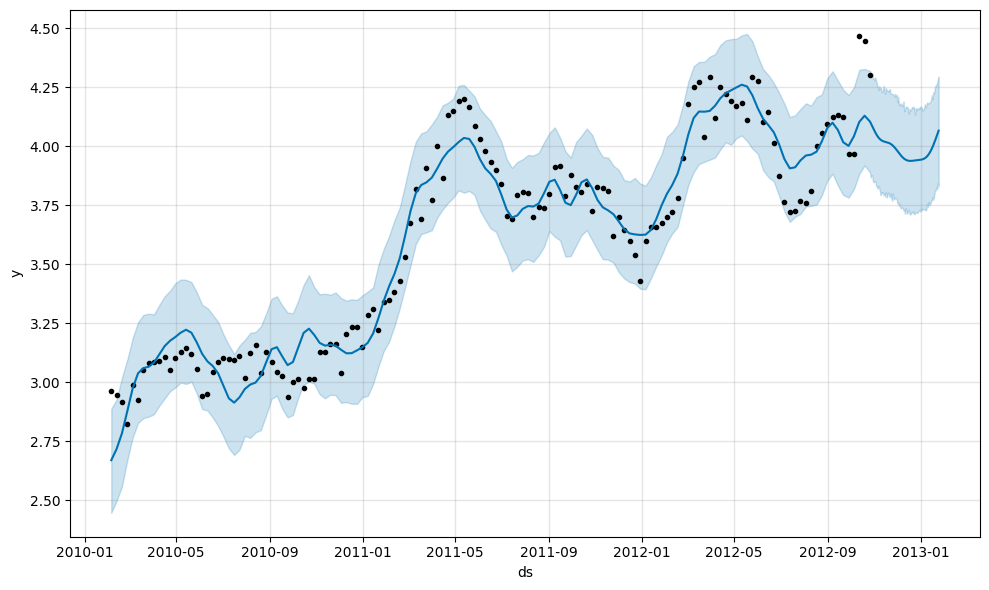

In [157]:
Store_38_WS_FP_plot=con_model.plot(forecast)

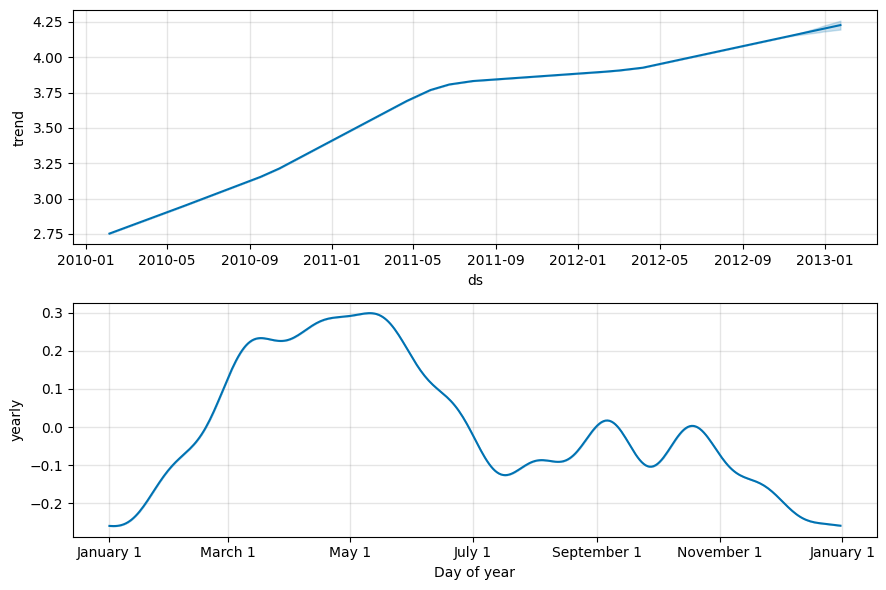

In [158]:
Store_38_WS_FP_forecast_plot1 = con_model.plot_components(forecast)

#### The fuel price in the area of Store no. 38 is expected to decline slightly at the end of 2012.

-------------------------------------------------------------------------------------------------------------------------------

## Analysis of Store no. 33

In [159]:
df33 = data[data['Store'] == 33]
df33

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4576,33,05-02-2010,274593.43,0,58.40,2.962,126.442065,10.115
4577,33,12-02-2010,294882.83,1,55.47,2.828,126.496258,10.115
4578,33,19-02-2010,296850.83,0,62.16,2.915,126.526286,10.115
4579,33,26-02-2010,284052.77,0,56.50,2.825,126.552286,10.115
4580,33,05-03-2010,291484.89,0,59.17,2.877,126.578286,10.115
...,...,...,...,...,...,...,...,...
4714,33,28-09-2012,242813.51,0,86.42,3.966,131.043000,7.147
4715,33,05-10-2012,265444.90,0,85.18,4.132,131.075667,6.895
4716,33,12-10-2012,291781.15,0,79.64,4.468,131.108333,6.895
4717,33,19-10-2012,254412.34,0,75.55,4.449,131.149968,6.895


In [160]:
df33['Date'] = pd.to_datetime(df33['Date'],format='%d-%m-%Y')

# Extract day, month, and year into separate columns
df33['day'] = df33['Date'].dt.day
df33['month'] = df33['Date'].dt.month
df33['year'] = df33['Date'].dt.year

df33

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
4576,33,2010-02-05,274593.43,0,58.40,2.962,126.442065,10.115,5,2,2010
4577,33,2010-02-12,294882.83,1,55.47,2.828,126.496258,10.115,12,2,2010
4578,33,2010-02-19,296850.83,0,62.16,2.915,126.526286,10.115,19,2,2010
4579,33,2010-02-26,284052.77,0,56.50,2.825,126.552286,10.115,26,2,2010
4580,33,2010-03-05,291484.89,0,59.17,2.877,126.578286,10.115,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
4714,33,2012-09-28,242813.51,0,86.42,3.966,131.043000,7.147,28,9,2012
4715,33,2012-10-05,265444.90,0,85.18,4.132,131.075667,6.895,5,10,2012
4716,33,2012-10-12,291781.15,0,79.64,4.468,131.108333,6.895,12,10,2012
4717,33,2012-10-19,254412.34,0,75.55,4.449,131.149968,6.895,19,10,2012


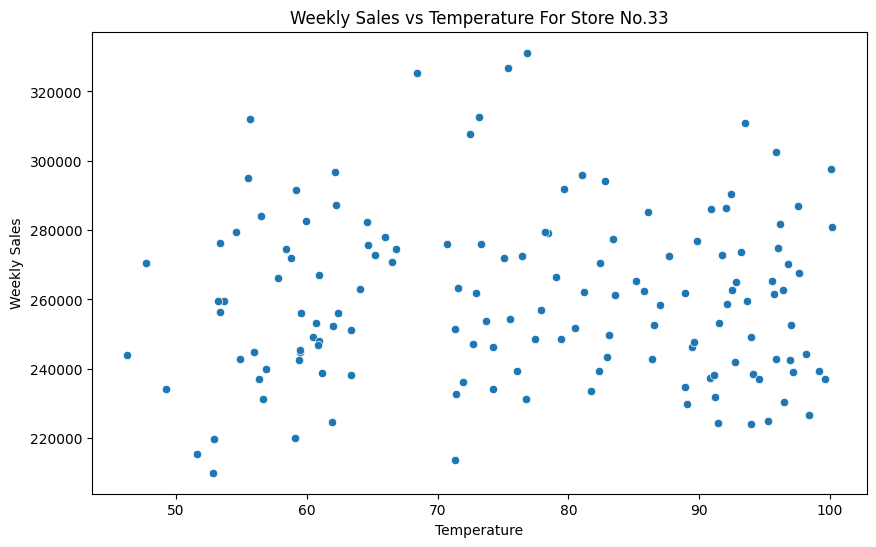

In [161]:

# Create a line plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df33)
plt.title('Weekly Sales vs Temperature For Store No.33')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [162]:
df33_ = df33[['Weekly_Sales','Date']]
df33_ = df33_.set_index(['Date'])
df33_

,Weekly_Sales
Date,
2010-02-05,274593.43
2010-02-12,294882.83
2010-02-19,296850.83
2010-02-26,284052.77
2010-03-05,291484.89
...,...
2012-09-28,242813.51
2012-10-05,265444.90
2012-10-12,291781.15


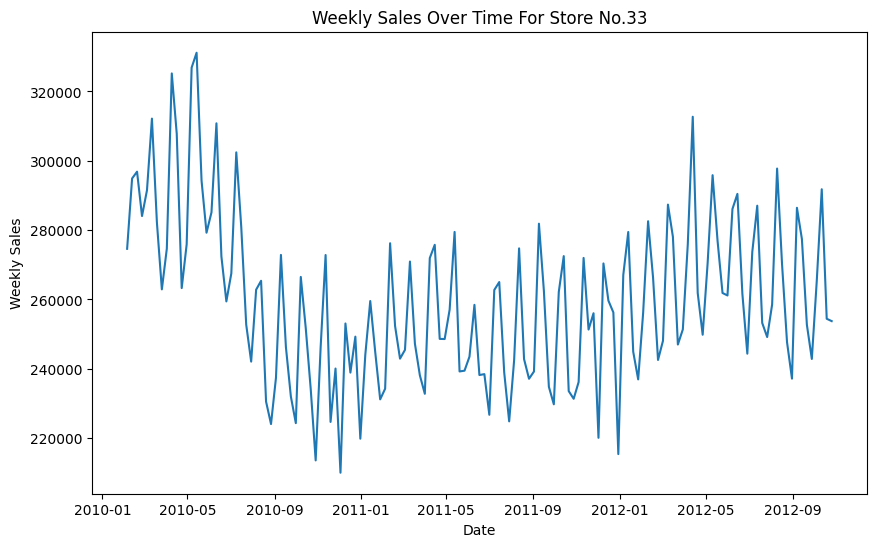

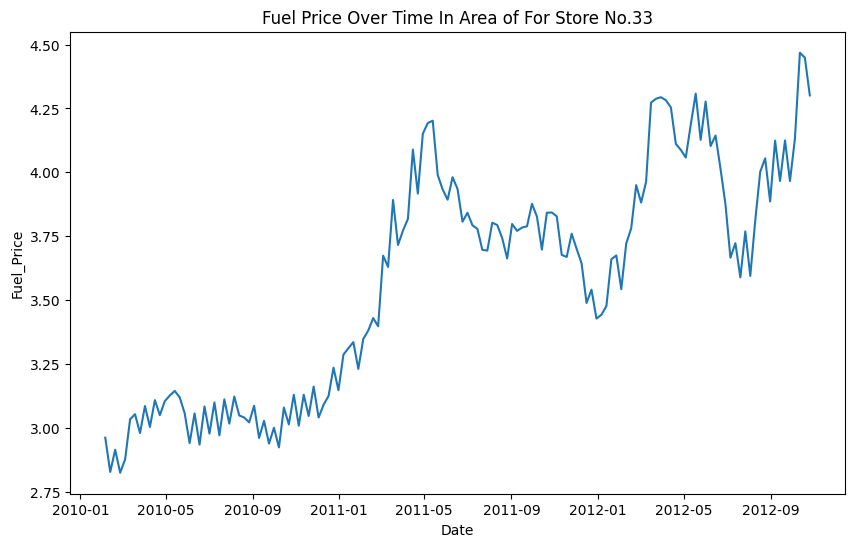

In [208]:

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df33_)
plt.title('Weekly Sales Over Time For Store No.33')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Fuel_Price', data=df33)
plt.title('Fuel Price Over Time In Area of For Store No.33')
plt.xlabel('Date')
plt.ylabel('Fuel_Price')
plt.show()

### Applying FB Prophet Model to check the trends of weekly sales and fuel price w.r.t date for Store No.33

### Trend and Prediction of Weekly Sales w.r.t Date in the area of Store no. 33

In [164]:
store_33_WS = df33[['Date', 'Weekly_Sales']].reset_index(drop=True)
store_33_WS

,Date,Weekly_Sales
0,2010-02-05,274593.43
1,2010-02-12,294882.83
2,2010-02-19,296850.83
3,2010-02-26,284052.77
4,2010-03-05,291484.89
...,...,...
138,2012-09-28,242813.51
139,2012-10-05,265444.90
140,2012-10-12,291781.15
141,2012-10-19,254412.34


In [165]:
store_33_WS.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
store_33_WS

,ds,y
0,2010-02-05,274593.43
1,2010-02-12,294882.83
2,2010-02-19,296850.83
3,2010-02-26,284052.77
4,2010-03-05,291484.89
...,...,...
138,2012-09-28,242813.51
139,2012-10-05,265444.90
140,2012-10-12,291781.15
141,2012-10-19,254412.34


In [166]:
con_model=Prophet(interval_width=0.95)

In [167]:
# Training of Model (fiting thr data to the model)
con_model.fit(store_33_WS)

13:32:30 - cmdstanpy - INFO - Chain [1] start processing
13:32:30 - cmdstanpy - INFO - Chain [1] done processing


In [168]:
future=con_model.make_future_dataframe(periods=90)

In [169]:
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
228,2013-01-20
229,2013-01-21
230,2013-01-22
231,2013-01-23


In [170]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
218,2013-01-10,267718.970231,234263.063353,304398.493202
219,2013-01-11,267723.550759,233462.780350,302122.503173
220,2013-01-12,267774.423074,230495.311377,302719.308669
221,2013-01-13,267874.369900,233823.880819,299590.359860
222,2013-01-14,268024.543040,235256.756434,302735.536604
223,2013-01-15,268224.490812,234627.605677,305308.819486
224,2013-01-16,268472.238760,233255.821870,304937.522367
225,2013-01-17,268764.420115,231973.295222,301672.047753
226,2013-01-18,269096.450874,235710.296625,302097.260000
227,2013-01-19,269462.742987,235495.548237,303196.649226


### Weekly Sales Trend In Area of Store no. 33

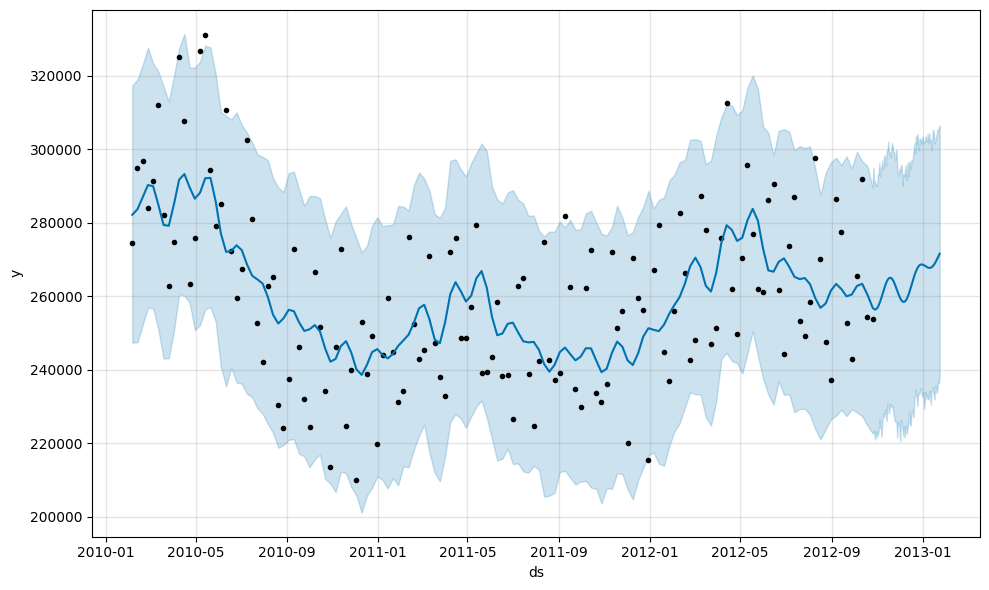

In [171]:
Store_33_WS_plot=con_model.plot(forecast)

### The weekly sales for Store no. 33 decreases at the end of year 2010,2011 and 2012.It is observed that the weekly sales was higher in the month of May consecutively for 2010, 2011 and 2012.   

### Trend and Prediction of Fuel Price w.r.t Date in the area of Store 33

In [172]:
store_33_WS_FP = df33[['Date', 'Fuel_Price']].reset_index(drop=True)
store_33_WS_FP

,Date,Fuel_Price
0,2010-02-05,2.962
1,2010-02-12,2.828
2,2010-02-19,2.915
3,2010-02-26,2.825
4,2010-03-05,2.877
...,...,...
138,2012-09-28,3.966
139,2012-10-05,4.132
140,2012-10-12,4.468
141,2012-10-19,4.449


In [173]:
store_33_WS_FP.rename(columns={"Date":"ds","Fuel_Price":"y"},inplace=True)
store_33_WS_FP

,ds,y
0,2010-02-05,2.962
1,2010-02-12,2.828
2,2010-02-19,2.915
3,2010-02-26,2.825
4,2010-03-05,2.877
...,...,...
138,2012-09-28,3.966
139,2012-10-05,4.132
140,2012-10-12,4.468
141,2012-10-19,4.449


In [174]:
con_model=Prophet(interval_width=0.95)

In [175]:
con_model.fit(store_33_WS_FP)

13:32:31 - cmdstanpy - INFO - Chain [1] start processing
13:32:31 - cmdstanpy - INFO - Chain [1] done processing


In [176]:
future=con_model.make_future_dataframe(periods=90)

In [177]:
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
228,2013-01-20
229,2013-01-21
230,2013-01-22
231,2013-01-23


In [178]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
218,2013-01-10,3.939636,3.718495,4.181769
219,2013-01-11,3.944240,3.713953,4.166696
220,2013-01-12,3.948864,3.715638,4.182147
221,2013-01-13,3.953542,3.700892,4.182727
222,2013-01-14,3.958318,3.702998,4.184369
223,2013-01-15,3.963233,3.723017,4.204260
224,2013-01-16,3.968332,3.732535,4.215007
225,2013-01-17,3.973660,3.735058,4.224762
226,2013-01-18,3.979258,3.748263,4.193790
227,2013-01-19,3.985162,3.745836,4.206979


### Fuel Price Trend In Area of Store no.33 

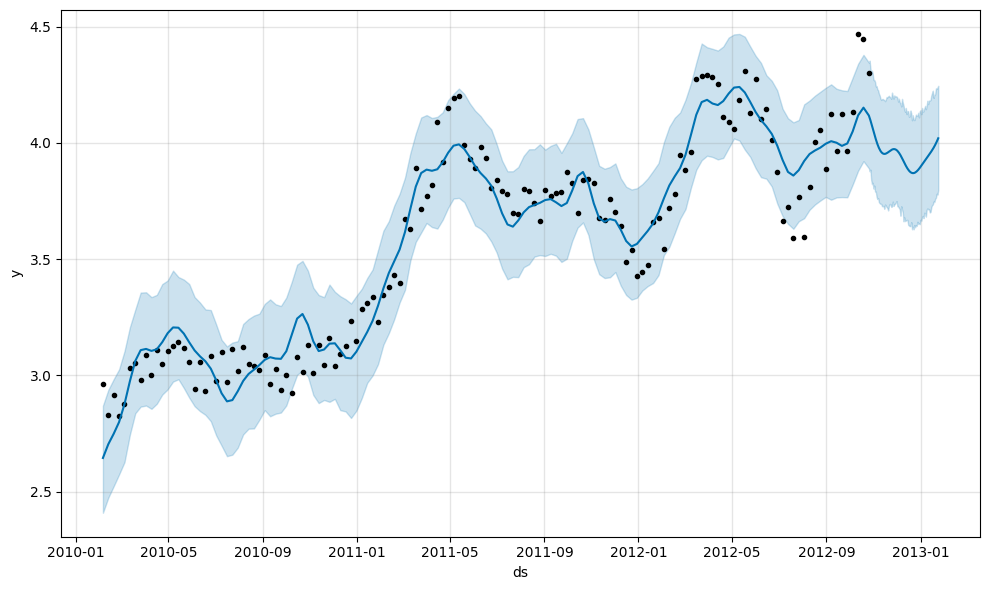

In [179]:
Store_33_WS_FP_plot=con_model.plot(forecast)

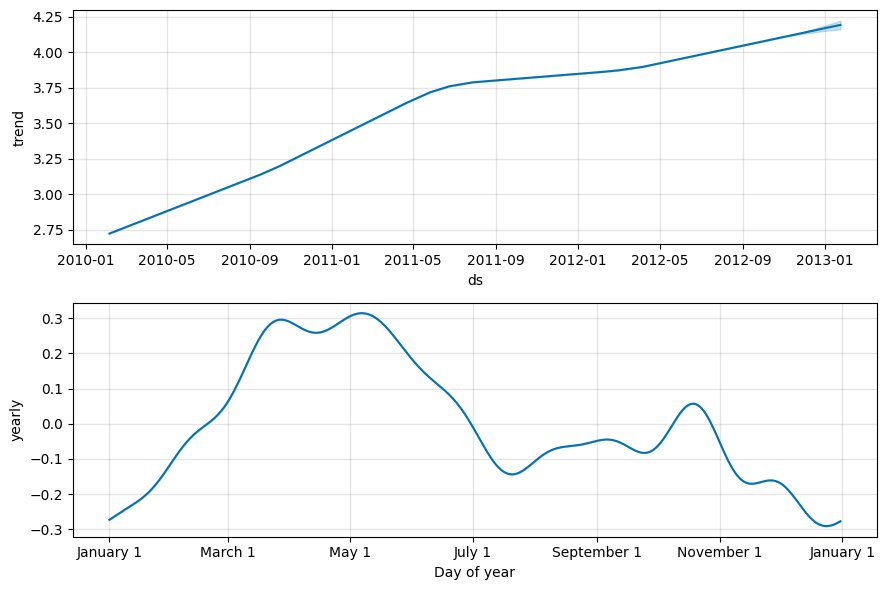

In [180]:
Store_33_WS_FP_forecast_plot1 = con_model.plot_components(forecast)

### Despite higher fuel price especially in May of 2010, 2011 and 2012, in the area of Store no. 33, the weekly sales is higher.  However the sales was decreasing during the rest of the period, although the fuel price was decreading too. This shows that thre is a periodic spike specifically in the monthe of May.

--------------------------------------------------------------------------------------------------------------------------------

## Analysis of Store no. 2

In [181]:
df2 = data[data['Store'] == 2]
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...
281,2,28-09-2012,1746470.56,0,79.45,3.666,222.616433,6.565
282,2,05-10-2012,1998321.04,0,70.27,3.617,222.815930,6.170
283,2,12-10-2012,1900745.13,0,60.97,3.601,223.015426,6.170
284,2,19-10-2012,1847990.41,0,68.08,3.594,223.059808,6.170


### Applying FB Prophet Model to check the trends of weekly sales and fuel price w.r.t date for Store No.2

### Trend and Prediction of Weekly Sales w.r.t Date in the area of Store no.2

In [182]:
store_2_WS = df2[['Date', 'Weekly_Sales']].reset_index(drop=True)
store_2_WS

,Date,Weekly_Sales
0,05-02-2010,2136989.46
1,12-02-2010,2137809.50
2,19-02-2010,2124451.54
3,26-02-2010,1865097.27
4,05-03-2010,1991013.13
...,...,...
138,28-09-2012,1746470.56
139,05-10-2012,1998321.04
140,12-10-2012,1900745.13
141,19-10-2012,1847990.41


In [183]:
store_2_WS.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
store_2_WS

,ds,y
0,05-02-2010,2136989.46
1,12-02-2010,2137809.50
2,19-02-2010,2124451.54
3,26-02-2010,1865097.27
4,05-03-2010,1991013.13
...,...,...
138,28-09-2012,1746470.56
139,05-10-2012,1998321.04
140,12-10-2012,1900745.13
141,19-10-2012,1847990.41


In [184]:
con_model=Prophet(interval_width=0.95)

In [185]:
con_model.fit(store_2_WS)

13:32:33 - cmdstanpy - INFO - Chain [1] start processing
13:32:33 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
future=con_model.make_future_dataframe(periods=90)

In [187]:
future

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
228,2013-03-06
229,2013-03-07
230,2013-03-08
231,2013-03-09


In [188]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
218,2013-02-24,1.959165e+06,1.619936e+06,2.299105e+06
219,2013-02-25,1.991386e+06,1.646114e+06,2.338163e+06
220,2013-02-26,1.971884e+06,1.644371e+06,2.325581e+06
221,2013-02-27,1.932713e+06,1.591459e+06,2.285955e+06
222,2013-02-28,1.906255e+06,1.575443e+06,2.232541e+06
223,2013-03-01,1.889128e+06,1.547877e+06,2.232407e+06
224,2013-03-02,1.809729e+06,1.477485e+06,2.148819e+06
225,2013-03-03,1.951541e+06,1.628340e+06,2.313557e+06
226,2013-03-04,1.988039e+06,1.648172e+06,2.291335e+06
227,2013-03-05,1.971753e+06,1.612296e+06,2.303394e+06


### Weekly Sales Trend For Store no.2

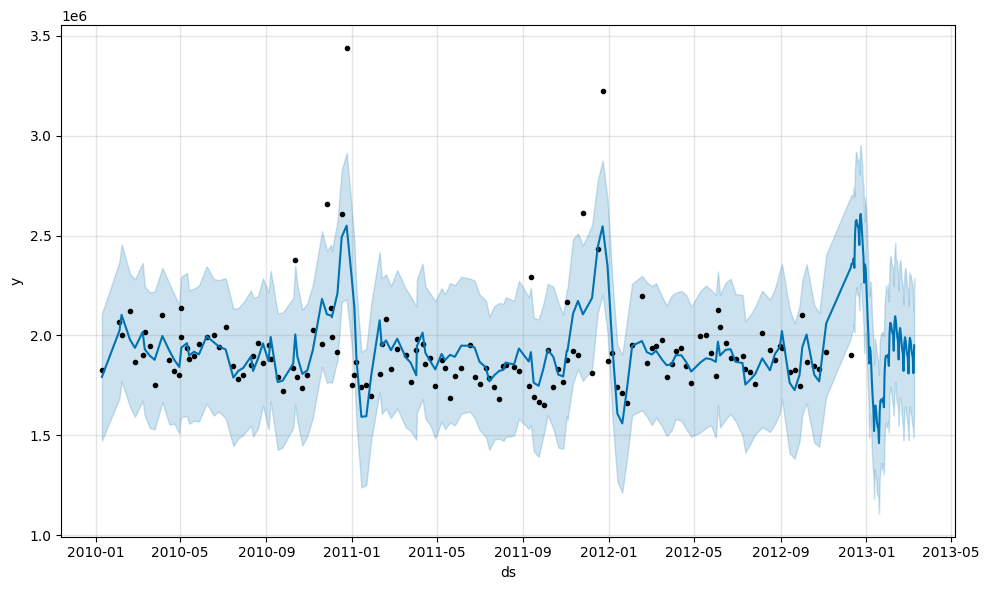

In [189]:
Store_33_WS_plot=con_model.plot(forecast)

### The weekly sales increases at the end of each year for Store no.2.

### Trend and Prediction of Fuel Price w.r.t Date in the area of Store 2

In [190]:
store_2_WS_FP = df2[['Date', 'Fuel_Price']].reset_index(drop=True)
store_2_WS_FP

,Date,Fuel_Price
0,05-02-2010,2.572
1,12-02-2010,2.548
2,19-02-2010,2.514
3,26-02-2010,2.561
4,05-03-2010,2.625
...,...,...
138,28-09-2012,3.666
139,05-10-2012,3.617
140,12-10-2012,3.601
141,19-10-2012,3.594


In [191]:
store_2_WS_FP.rename(columns={"Date":"ds","Fuel_Price":"y"},inplace=True)
store_2_WS_FP

,ds,y
0,05-02-2010,2.572
1,12-02-2010,2.548
2,19-02-2010,2.514
3,26-02-2010,2.561
4,05-03-2010,2.625
...,...,...
138,28-09-2012,3.666
139,05-10-2012,3.617
140,12-10-2012,3.601
141,19-10-2012,3.594


In [192]:
con_model=Prophet(interval_width=0.95)

In [193]:
con_model.fit(store_2_WS_FP)

13:32:34 - cmdstanpy - INFO - Chain [1] start processing
13:32:34 - cmdstanpy - INFO - Chain [1] done processing


In [194]:
future=con_model.make_future_dataframe(periods=90)

In [195]:
future

,ds
0,2010-01-10
1,2010-02-04
2,2010-02-07
3,2010-02-19
4,2010-02-26
...,...
228,2013-03-06
229,2013-03-07
230,2013-03-08
231,2013-03-09


In [196]:
future=con_model.make_future_dataframe(periods=90)

In [197]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(15)

,ds,yhat,yhat_lower,yhat_upper
218,2013-02-24,3.757391,3.426514,4.094975
219,2013-02-25,3.707572,3.353403,4.039023
220,2013-02-26,3.632951,3.309615,3.972621
221,2013-02-27,3.628978,3.287510,3.970031
222,2013-02-28,3.701680,3.367199,4.077164
223,2013-03-01,3.655226,3.319190,4.020747
224,2013-03-02,3.495127,3.133368,3.853214
225,2013-03-03,3.780196,3.439693,4.109178
226,2013-03-04,3.742821,3.371659,4.080070
227,2013-03-05,3.680094,3.345015,4.031412


### Fuel Price Trend In Area of Store no. 2

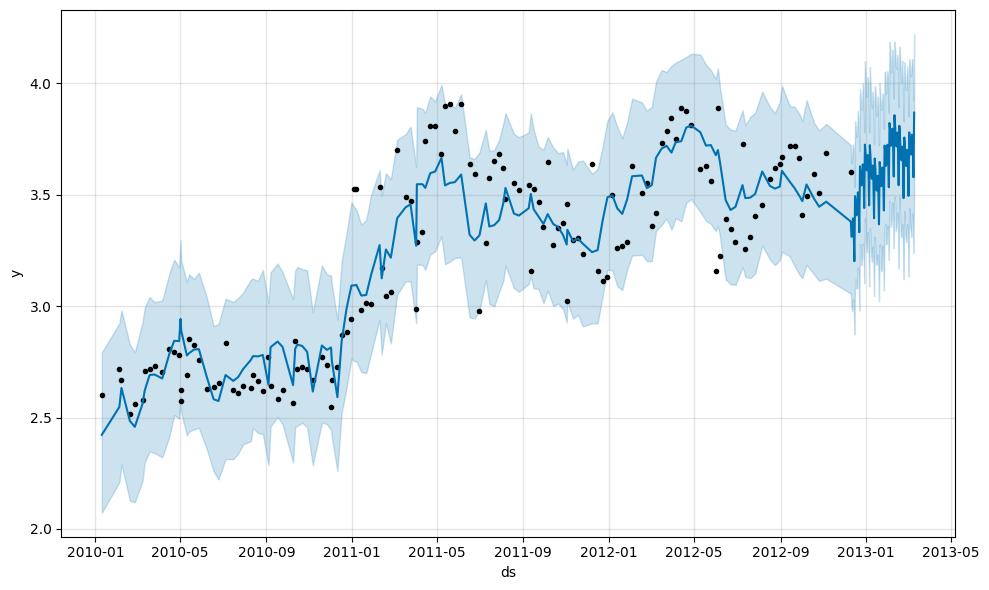

In [198]:
store_2_WS_FP_plot=con_model.plot(forecast)

### The fuel price is predicted to increase slightly at the beginning of 2013 in the area of Store no.2.

-------------------------------------------------------------------------------------------------------------------------------

### Comparison of Weekly Sales, Fuel Price and CPI for Store nos. 2,4,33 and 38.

In [199]:
sales_by_store = pd.concat([
    df2.groupby('Store')['Weekly_Sales'].sum(),
    df4.groupby('Store')['Weekly_Sales'].sum(),
    df33.groupby('Store')['Weekly_Sales'].sum(),
    df38.groupby('Store')['Weekly_Sales'].sum()
])

fuel_price_by_store = pd.concat([
    df2.groupby('Store')['Fuel_Price'].mean().round(3),
    df4.groupby('Store')['Fuel_Price'].mean().round(3),
    df33.groupby('Store')['Fuel_Price'].mean().round(3),
    df38.groupby('Store')['Fuel_Price'].mean().round(3)
])

CPI_Index = pd.concat([
    df2.groupby('Store')['CPI'].mean().round(3),
    df4.groupby('Store')['CPI'].mean().round(3),
    df33.groupby('Store')['CPI'].mean().round(3),
    df38.groupby('Store')['CPI'].mean().round(3) 
   
])

result_df = pd.DataFrame({'Weekly_Sales': sales_by_store, 'Fuel_Price_Mean': fuel_price_by_store, 'Consumer_Price_Index': CPI_Index}).reset_index()
result_df

,Store,Weekly_Sales,Fuel_Price_Mean,Consumer_Price_Index
0,2,2.753824e+08,3.220,215.646
1,4,2.995440e+08,3.217,128.680
2,33,3.716022e+07,3.576,128.680
3,38,5.515963e+07,3.606,128.680


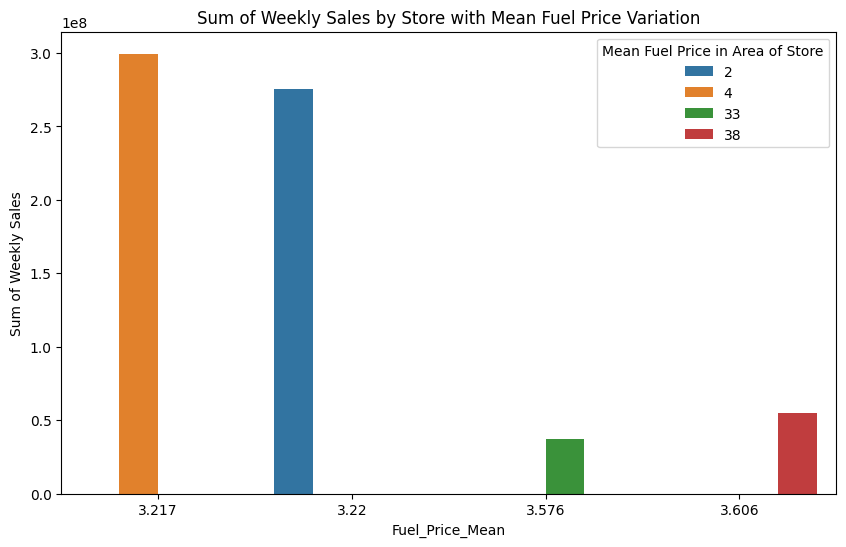

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Price_Mean', y='Weekly_Sales', hue='Store', data=result_df)

plt.title('Sum of Weekly Sales by Store with Mean Fuel Price Variation')
plt.xlabel('Fuel_Price_Mean')
plt.ylabel('Sum of Weekly Sales')
plt.legend(title='Mean Fuel Price in Area of Store')
plt.show()


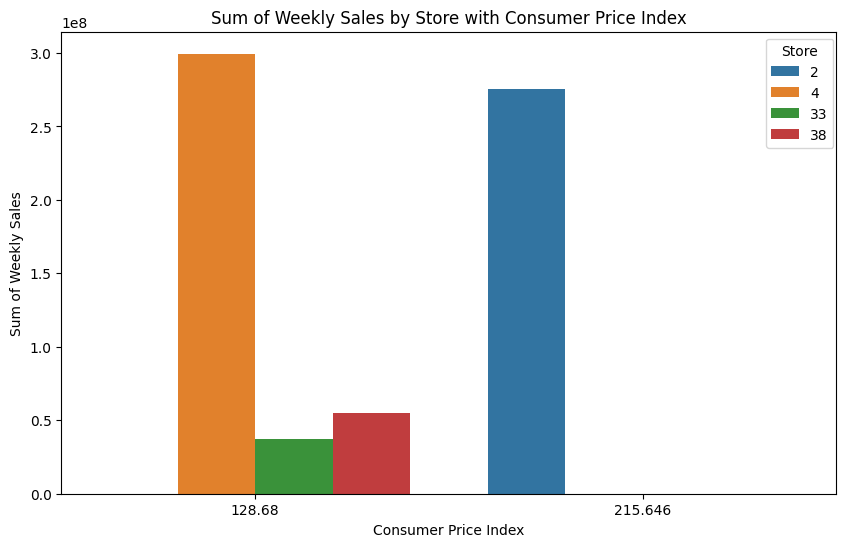

In [201]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Consumer_Price_Index', y='Weekly_Sales', hue='Store', data=result_df)

plt.title('Sum of Weekly Sales by Store with Consumer Price Index')
plt.xlabel('Consumer Price Index')
plt.ylabel('Sum of Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(0.9, 1), loc='upper left')  
plt.show()

### Checking the counting of Holiday Flags For Store nos.2,4,33 and 38 

In [202]:
df2_holiday = df2['Holiday_Flag'].value_counts()
df2_holiday

0    133
1     10
Name: Holiday_Flag, dtype: int64

In [203]:
df4_holiday = df4['Holiday_Flag'].value_counts()
df4_holiday

0    133
1     10
Name: Holiday_Flag, dtype: int64

In [204]:
df33_holiday = df33['Holiday_Flag'].value_counts()
df33_holiday

0    133
1     10
Name: Holiday_Flag, dtype: int64

In [205]:
df38_holiday = df38['Holiday_Flag'].value_counts()
df38_holiday

0    133
1     10
Name: Holiday_Flag, dtype: int64

### There is no variation in the count of 0 and 1 of Holiday flags for stores.

## Conclusions:

### Walmart data is analyzed based on total weekly sales and unemployment for 3 years, viz., 2010, 2011 and 2012.

### ARIMA and PROPHET models have been used to predict and analyze trends.

### Temperature has no effect on the weekly sales.

### The ratio of total weekly sales (WS) and unemployment (UR) w.r.t to the each store is plotted to ascertain how stores are performing.
    
### Based on the ratio of WS and UR, the store nos. 2,4 & 33,38 are found to be the best and the worst performing stores respectively.

### For these selected stores,in each year of 2010, 2011 and 2012, the montly trend of weekly sales was plotted and studied to analyze trends.

### It was noted that the spike in the fuel prices occured in areas of all above mentioned stores, especially in the month of May in all given years consecutively.

### Store no.2 :  
### No significant change in the weely sales except in the month of November and December of year 2010, 2011 and 2012.There was a rise of around 30-40% in November and December, and the trend is expected to continue in 2013.

### Store no.4 :  
### In case of Store no.4, the trends of weekly sales and fuel price are similar to those observed for Store no.2.There was no significant difference in the fuel price.
### In contrast to the previous weekly sales trends in year 2011 and 2012, there could be an increase in the weekly sales from August to September in 2012. This trend is compatible with the decrease in the fuel price as plotted during the same period.  

### Store no.33 : 
### For Store no. 33 it was interesting to see that the higher weekly sales occured in the month of May, although there was sharp increase in the fuel price i.e., almost by 30% from January to May in 2010, 2011 and 2012.
### The higher weekly sales are reported in the month of May, especially, when the fuel price was the highest. 

### Store no.38 : 
### For Store no. 38, the overall trens shows that the weekly sales is increasing, although the overall fuel price is higher in the area in the 2011 and 2012. The weekly sales was higher by 8% and 10% at the end of 2010 and 2011 respectively.
### An increase in the weekly sales of around 2% is expected, which is lower possibly because of the higher fuel price. The weekly sales is, however, is continued to increase based on the predicted trend.

### General Inferences : 

### Despite having lower consumer price index for Store no.4 as compared to Store no.2, the total weekly sales of Store no. 4 is hardly 10% higher as compared to that of Store no.2. 

### Store nos. 2 and 4 are performing well as comapred to Store nos. 33 and 38 based on the weekly sales data over the past 3 years.

### Since the sale of Store no. 38 is increasing, irrespective of the higher fuel price, people are mostly buying essentail items.

### In area of Store no. 33, people were mostly buying products useful for summer season as the higher weekles sales occurs in April to May.

### There is possibility that the people in area of Store nos. 33 and 38 belong to lower level income as the consumer price index is lower too.

### In case of Store nos. 2 & 4, a sudden spike in the weekly sales occurs at the end of the year. As compared to Store no. 4, Store no. 2 is performing well although the consumer price insex (CPI) is much higher.
### This also indicated that people are buying luxurious items in addition to essectial items due to their bigger purchasing power.
### The people in the areas of Store nos. 2 and 4 could possibly a mixture of higher and middle income groups.

### Holidays do not affect weekly sales for the stores.    
